In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import islice
import warnings
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the combined health_rest dataset

In [ ]:
data = '/content/drive/MyDrive/DSCI 560 Project/Data/combined_rest_health_0331.csv'
data_df = pd.read_csv(data)
data_df.head()

,FACILITY_NAME,FACILITY_ADDRESS,FACILITY_CITY,FACILITY_ID,FACILITY_STATE,FACILITY_ZIP,OWNER_ID,PE_DESCRIPTION,SCORE,VIOLATION_CODE,VIOLATION_DESCRIPTION,type,size,risk_level,ID,restaurant_id,url,name,address,score,review_counts,price,category,open_time,amenities,open_hours_week,new_address,state,zipcode,city,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,comments_list
0,#1 CAFE,2080 CENTURY PARK E STE 108,LOS ANGELES,FA0056432,CA,90067,OW0000002,RESTAURANT (0-30) SEATS HIGH RISK,90.521739,"F014,F007,F033,F036,F027,F035,F034,F049,F040,F...",# 14. Food contact surfaces: clean and sanitiz...,restaurant,0-30,HIGH,0,753,https://www.yelp.com/biz/one-cafe-los-angeles-...,One Cafe,"2080 Century Park E Los Angeles, CA 90067",3.5,7 reviews,$$,Cafes,NaN,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,2080 Century Park E Los Angeles,CA,90067,Los Angeles,See all 18 photos,False,True,False,4.0,NaN,"[""Hi, it's Pauly P here dropping a bomb review..."
1,#2 MOON BBQ,478 N WESTERN AVE,LOS ANGELES,FA0002817,CA,90004,OW0024959,RESTAURANT (61-150) SEATS HIGH RISK,91.880952,"F013,F037,F033,F044,F033,F014,F046,F035,F033,F...","# 13. Food in good condition, safe and unadult...",restaurant,61-150,HIGH,4,2526,https://www.yelp.com/biz/moon-bbq-2-los-angele...,Moon BBQ 2,"478 N Western Ave Los Angeles, CA 90004",3.0,838 reviews,$$,"Korean, Barbeque",Mon\n11:00 AM - 2:00 AM (Next day)\nTue\n11:00...,Amenities and More\nHealth ScoreA\nNo Reservat...,NaN,478 N Western Ave Los Angeles,CA,90004,Los Angeles,See all 566 photos,True,True,False,19.0,See all 16 questions,"[""This is my go-to spot for cheap kbbq eats. T..."
2,101 ASIAN KITCHEN INC,7170 BEVERLY BLVD,LOS ANGELES,FA0224563,CA,90036,OW0229023,RESTAURANT (0-30) SEATS HIGH RISK,90.894737,"F009,F052,F036,F030,F053,F037,F039,F033,F044,F...","# 09. Proper cooling methods,# 01b. Food safet...",restaurant,0-30,HIGH,15,1080,https://www.yelp.com/biz/101-asian-kitchen-los...,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036",3.5,232 reviews,$$,"Chinese, Sushi Bars, Hawaiian",Mon\r\n3:00 PM - 1:00 AM (Next day)\r\nTue\r\n...,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,7170 Beverly Blvd Los Angeles,CA,90036,Los Angeles,See all 118 photos,True,True,False,16.0,NaN,"[""Hey why not get yourself some Chinese Food (..."
3,WOK MASTER,7170 BEVERLY BLVD,LOS ANGELES,FA0175504,CA,90036,OW0182054,RESTAURANT (0-30) SEATS HIGH RISK,90.000000,"F033,F036,F037,F040,F039,F023,F004,F044",# 33. Nonfood-contact surfaces clean and in go...,restaurant,0-30,HIGH,13009,1080,https://www.yelp.com/biz/101-asian-kitchen-los...,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036",3.5,232 reviews,$$,"Chinese, Sushi Bars, Hawaiian",Mon\r\n3:00 PM - 1:00 AM (Next day)\r\nTue\r\n...,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,7170 Beverly Blvd Los Angeles,CA,90036,Los Angeles,See all 118 photos,True,True,False,16.0,NaN,"[""Hey why not get yourself some Chinese Food (..."
4,24 HOUR FITNESS #122,5959 W CENTURY BLVD,LOS ANGELES,FA0139042,CA,90045,OW0000732,"FOOD MKT RETAIL (2,000+ SF) LOW RISK",99.000000,F033,# 33. Nonfood-contact surfaces clean and in go...,food market,"2,000+ SF",LOW,34,7523,https://www.yelp.com/biz/5959-kitchen-and-bar-...,5959 Kitchen and Bar,"5959 W Century Blvd Los Angeles, CA 90045",5.0,2 reviews,NaN,"Cocktail Bars, American (Traditional)",Mon\n11:00 AM - 11:00 PM\nTue\n11:00 AM - 11:0...,Amenities and More\nHealth ScoreA\nOffers Take...,84.0,5959 W Century Blvd Los Angeles,CA,90045,Los Angeles,See all 5 photos,False,True,True,20.0,NaN,['The food is fantastic and the price is right...


### EDA

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FACILITY_NAME          2345 non-null   object 
 1   FACILITY_ADDRESS       2345 non-null   object 
 2   FACILITY_CITY          2345 non-null   object 
 3   FACILITY_ID            2345 non-null   object 
 4   FACILITY_STATE         2345 non-null   object 
 5   FACILITY_ZIP           2345 non-null   object 
 6   OWNER_ID               2345 non-null   object 
 7   PE_DESCRIPTION         2345 non-null   object 
 8   SCORE                  2345 non-null   float64
 9   VIOLATION_CODE         2345 non-null   object 
 10  VIOLATION_DESCRIPTION  2345 non-null   object 
 11  type                   2345 non-null   object 
 12  size                   2345 non-null   object 
 13  risk_level             2343 non-null   object 
 14  ID                     2345 non-null   int64  
 15  rest

In [ ]:
zipcode_list = [str(x) for x in list(data_df['FACILITY_ZIP'].value_counts().keys())]
count_list = list(data_df['FACILITY_ZIP'].value_counts().values)

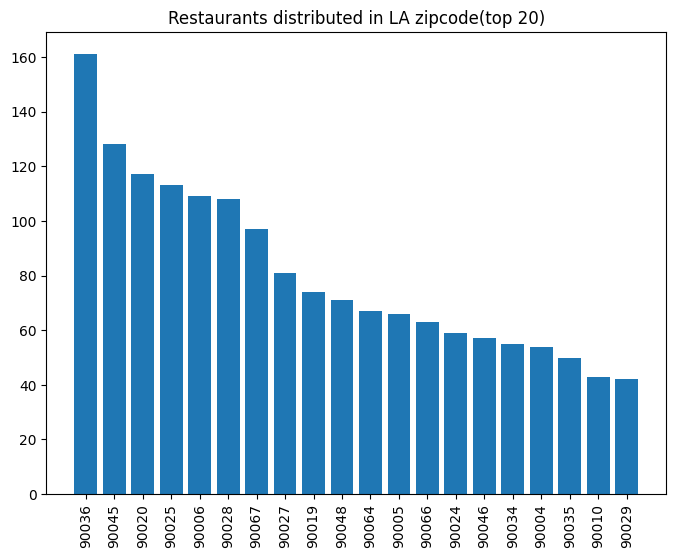

In [ ]:
fig = plt.figure(figsize = (8, 6))
plt.bar(zipcode_list[:20], count_list[:20])
plt.title('Restaurants distributed in LA zipcode(top 20)')
plt.xticks(rotation = 90)
plt.show()

Encode cities with one hot encoding.

In [ ]:
city_other_list = []
for city, count in data_df['FACILITY_CITY'].value_counts().items():
    if count <= 40:
        city_other_list.append(city)

In [ ]:
data_df['city_grouped'] = data_df['FACILITY_CITY'].apply(lambda x: x if x not in city_other_list else 'other')
data_df['city_grouped'].value_counts()

LOS ANGELES    2345
Name: city_grouped, dtype: int64

In [ ]:
city_df = pd.get_dummies(data_df.city_grouped, prefix='city')
processed_df = pd.concat([data_df, city_df], axis=1)
processed_df.head()

,FACILITY_NAME,FACILITY_ADDRESS,FACILITY_CITY,FACILITY_ID,FACILITY_STATE,FACILITY_ZIP,OWNER_ID,PE_DESCRIPTION,SCORE,VIOLATION_CODE,VIOLATION_DESCRIPTION,type,size,risk_level,ID,restaurant_id,url,name,address,score,review_counts,price,category,open_time,amenities,open_hours_week,new_address,state,zipcode,city,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,comments_list,score_binned,city_grouped,city_LOS ANGELES
0,#1 CAFE,2080 CENTURY PARK E STE 108,LOS ANGELES,FA0056432,CA,90067,OW0000002,RESTAURANT (0-30) SEATS HIGH RISK,90.521739,"F014,F007,F033,F036,F027,F035,F034,F049,F040,F...",# 14. Food contact surfaces: clean and sanitiz...,restaurant,0-30,HIGH,0,753,https://www.yelp.com/biz/one-cafe-los-angeles-...,One Cafe,"2080 Century Park E Los Angeles, CA 90067",3.5,7 reviews,$$,Cafes,NaN,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,2080 Century Park E Los Angeles,CA,90067,Los Angeles,See all 18 photos,False,True,False,4.0,NaN,"[""Hi, it's Pauly P here dropping a bomb review...",low,LOS ANGELES,1
1,#2 MOON BBQ,478 N WESTERN AVE,LOS ANGELES,FA0002817,CA,90004,OW0024959,RESTAURANT (61-150) SEATS HIGH RISK,91.880952,"F013,F037,F033,F044,F033,F014,F046,F035,F033,F...","# 13. Food in good condition, safe and unadult...",restaurant,61-150,HIGH,4,2526,https://www.yelp.com/biz/moon-bbq-2-los-angele...,Moon BBQ 2,"478 N Western Ave Los Angeles, CA 90004",3.0,838 reviews,$$,"Korean, Barbeque",Mon\n11:00 AM - 2:00 AM (Next day)\nTue\n11:00...,Amenities and More\nHealth ScoreA\nNo Reservat...,NaN,478 N Western Ave Los Angeles,CA,90004,Los Angeles,See all 566 photos,True,True,False,19.0,See all 16 questions,"[""This is my go-to spot for cheap kbbq eats. T...",medium,LOS ANGELES,1
2,101 ASIAN KITCHEN INC,7170 BEVERLY BLVD,LOS ANGELES,FA0224563,CA,90036,OW0229023,RESTAURANT (0-30) SEATS HIGH RISK,90.894737,"F009,F052,F036,F030,F053,F037,F039,F033,F044,F...","# 09. Proper cooling methods,# 01b. Food safet...",restaurant,0-30,HIGH,15,1080,https://www.yelp.com/biz/101-asian-kitchen-los...,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036",3.5,232 reviews,$$,"Chinese, Sushi Bars, Hawaiian",Mon\r\n3:00 PM - 1:00 AM (Next day)\r\nTue\r\n...,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,7170 Beverly Blvd Los Angeles,CA,90036,Los Angeles,See all 118 photos,True,True,False,16.0,NaN,"[""Hey why not get yourself some Chinese Food (...",low,LOS ANGELES,1
3,WOK MASTER,7170 BEVERLY BLVD,LOS ANGELES,FA0175504,CA,90036,OW0182054,RESTAURANT (0-30) SEATS HIGH RISK,90.000000,"F033,F036,F037,F040,F039,F023,F004,F044",# 33. Nonfood-contact surfaces clean and in go...,restaurant,0-30,HIGH,13009,1080,https://www.yelp.com/biz/101-asian-kitchen-los...,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036",3.5,232 reviews,$$,"Chinese, Sushi Bars, Hawaiian",Mon\r\n3:00 PM - 1:00 AM (Next day)\r\nTue\r\n...,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,7170 Beverly Blvd Los Angeles,CA,90036,Los Angeles,See all 118 photos,True,True,False,16.0,NaN,"[""Hey why not get yourself some Chinese Food (...",low,LOS ANGELES,1
4,24 HOUR FITNESS #122,5959 W CENTURY BLVD,LOS ANGELES,FA0139042,CA,90045,OW0000732,"FOOD MKT RETAIL (2,000+ SF) LOW RISK",99.000000,F033,# 33. Nonfood-contact surfaces clean and in go...,food market,"2,000+ SF",LOW,34,7523,https://www.yelp.com/biz/5959-kitchen-and-bar-...,5959 Kitchen and Bar,"5959 W Century Blvd Los Angeles, CA 90045",5.0,2 reviews,NaN,"Cocktail Bars, American (Traditional)",Mon\n11:00 AM - 11:00 PM\nTue\n11:00 AM - 11:0...,Amenities and More\nHealth ScoreA\nOffers Take...,84.0,5959 W Century Blvd Los Angeles,CA,90045,Los Angeles,See all 5 photos,False,True,True,20.0,NaN,['The food is fantastic and the price is right...,high,LOS ANGELES,1


#### 3. violation_flag, type, size, violation_risk_level

Violation_flag looks evenly distributed.

In [ ]:
data_df['type'].value_counts()

restaurant     2174
food market     170
other             1
Name: type, dtype: int64

we can group the food market and other to one group

In [ ]:
# processed_df['type'] = processed_df['type'].apply(lambda x: 'other' if x=='food market' else x)
# processed_df['type'].value_counts()
data_df = data_df[data_df['type']!='food market']
data_df = data_df[data_df['type']!='other']

In [ ]:
data_df['size'].value_counts()

0-30      1057
31-60      565
61-150     424
151 +      128
Name: size, dtype: int64

In [ ]:
size_map = {}
size_map['0-30'] = 0
size_map['31-60'] = 1
size_map['61-150'] = 2
size_map['151 + '] = 3

Replace the restaurants with SQF and replace them with median

Need to group them together and encode.

In [ ]:
processed_df['coded_size'] = data_df['size'].apply(lambda x: size_map[x] if x in size_map.keys() else None)
#Finding the median of the column having NaN
size_median = processed_df['coded_size'].median()

# mean of values in the same column
processed_df['coded_size'].fillna(value=size_median, inplace=True)
processed_df['coded_size'].value_counts()

0.0    1057
1.0     736
2.0     424
3.0     128
Name: coded_size, dtype: int64

Encode risk level

In [ ]:
data_df['risk_level'].value_counts()  # store for later result visualization

HIGH     1659
MODER     394
LOW       121
Name: risk_level, dtype: int64

In [ ]:
risk_level_map = {'HIGH': 2, 'MODER': 1, 'LOW': 0}
processed_df['coded_risk_level'] = data_df['risk_level'].apply(lambda x: risk_level_map[x] if x in risk_level_map else None)
#Finding the median of the column having NaN
risk_level_median = processed_df['coded_risk_level'].median()

# mean of values in the same column
processed_df['coded_risk_level'].fillna(value=risk_level_median, inplace=True)
processed_df['coded_risk_level'].value_counts()

2.0    1830
1.0     394
0.0     121
Name: coded_risk_level, dtype: int64

In [ ]:
processed_df.head()

,FACILITY_NAME,FACILITY_ADDRESS,FACILITY_CITY,FACILITY_ID,FACILITY_STATE,FACILITY_ZIP,OWNER_ID,PE_DESCRIPTION,SCORE,VIOLATION_CODE,VIOLATION_DESCRIPTION,type,size,risk_level,ID,restaurant_id,url,name,address,score,review_counts,price,category,open_time,amenities,open_hours_week,new_address,state,zipcode,city,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,comments_list,score_binned,city_grouped,city_LOS ANGELES,coded_size,coded_risk_level
0,#1 CAFE,2080 CENTURY PARK E STE 108,LOS ANGELES,FA0056432,CA,90067,OW0000002,RESTAURANT (0-30) SEATS HIGH RISK,90.521739,"F014,F007,F033,F036,F027,F035,F034,F049,F040,F...",# 14. Food contact surfaces: clean and sanitiz...,restaurant,0-30,HIGH,0,753,https://www.yelp.com/biz/one-cafe-los-angeles-...,One Cafe,"2080 Century Park E Los Angeles, CA 90067",3.5,7 reviews,$$,Cafes,NaN,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,2080 Century Park E Los Angeles,CA,90067,Los Angeles,See all 18 photos,False,True,False,4.0,NaN,"[""Hi, it's Pauly P here dropping a bomb review...",low,LOS ANGELES,1,0.0,2.0
1,#2 MOON BBQ,478 N WESTERN AVE,LOS ANGELES,FA0002817,CA,90004,OW0024959,RESTAURANT (61-150) SEATS HIGH RISK,91.880952,"F013,F037,F033,F044,F033,F014,F046,F035,F033,F...","# 13. Food in good condition, safe and unadult...",restaurant,61-150,HIGH,4,2526,https://www.yelp.com/biz/moon-bbq-2-los-angele...,Moon BBQ 2,"478 N Western Ave Los Angeles, CA 90004",3.0,838 reviews,$$,"Korean, Barbeque",Mon\n11:00 AM - 2:00 AM (Next day)\nTue\n11:00...,Amenities and More\nHealth ScoreA\nNo Reservat...,NaN,478 N Western Ave Los Angeles,CA,90004,Los Angeles,See all 566 photos,True,True,False,19.0,See all 16 questions,"[""This is my go-to spot for cheap kbbq eats. T...",medium,LOS ANGELES,1,2.0,2.0
2,101 ASIAN KITCHEN INC,7170 BEVERLY BLVD,LOS ANGELES,FA0224563,CA,90036,OW0229023,RESTAURANT (0-30) SEATS HIGH RISK,90.894737,"F009,F052,F036,F030,F053,F037,F039,F033,F044,F...","# 09. Proper cooling methods,# 01b. Food safet...",restaurant,0-30,HIGH,15,1080,https://www.yelp.com/biz/101-asian-kitchen-los...,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036",3.5,232 reviews,$$,"Chinese, Sushi Bars, Hawaiian",Mon\r\n3:00 PM - 1:00 AM (Next day)\r\nTue\r\n...,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,7170 Beverly Blvd Los Angeles,CA,90036,Los Angeles,See all 118 photos,True,True,False,16.0,NaN,"[""Hey why not get yourself some Chinese Food (...",low,LOS ANGELES,1,0.0,2.0
3,WOK MASTER,7170 BEVERLY BLVD,LOS ANGELES,FA0175504,CA,90036,OW0182054,RESTAURANT (0-30) SEATS HIGH RISK,90.000000,"F033,F036,F037,F040,F039,F023,F004,F044",# 33. Nonfood-contact surfaces clean and in go...,restaurant,0-30,HIGH,13009,1080,https://www.yelp.com/biz/101-asian-kitchen-los...,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036",3.5,232 reviews,$$,"Chinese, Sushi Bars, Hawaiian",Mon\r\n3:00 PM - 1:00 AM (Next day)\r\nTue\r\n...,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,7170 Beverly Blvd Los Angeles,CA,90036,Los Angeles,See all 118 photos,True,True,False,16.0,NaN,"[""Hey why not get yourself some Chinese Food (...",low,LOS ANGELES,1,0.0,2.0
4,24 HOUR FITNESS #122,5959 W CENTURY BLVD,LOS ANGELES,FA0139042,CA,90045,OW0000732,"FOOD MKT RETAIL (2,000+ SF) LOW RISK",99.000000,F033,# 33. Nonfood-contact surfaces clean and in go...,food market,"2,000+ SF",LOW,34,7523,https://www.yelp.com/biz/5959-kitchen-and-bar-...,5959 Kitchen and Bar,"5959 W Century Blvd Los Angeles, CA 90045",5.0,2 reviews,NaN,"Cocktail Bars, American (Traditional)",Mon\n11:00 AM - 11:00 PM\nTue\n11:00 AM - 11:0...,Amenities and More\nHealth ScoreA\nOffers Take...,84.0,5959 W Century Blvd Los Angeles,CA,90045,Los Angeles,See all 5 photos,False,True,True,20.0,NaN,['The food is fantastic and the price is right...,high,LOS ANGELES,1,1.0,2.0


#### yelp features: score, review_counts, price, category

In [ ]:
processed_df['score_binned'].value_counts()

low       782
high      782
medium    781
Name: score_binned, dtype: int64

In [ ]:
processed_df['score'].fillna(value=processed_df['score'].mean(), inplace=True)

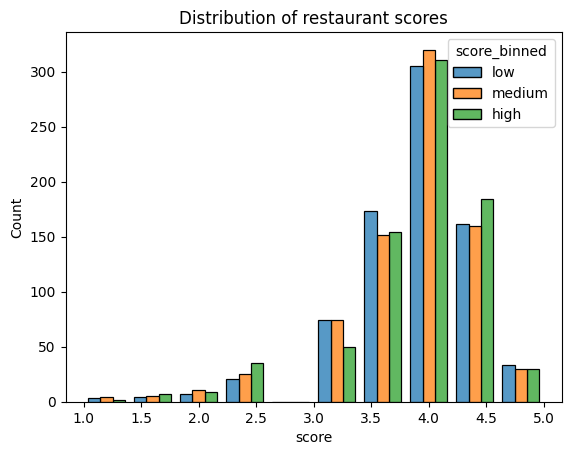

In [ ]:
sns.histplot(data=processed_df, x="score", bins = 10, multiple="dodge", hue="score_binned", shrink=.8)
plt.title("Distribution of restaurant scores")
plt.show()

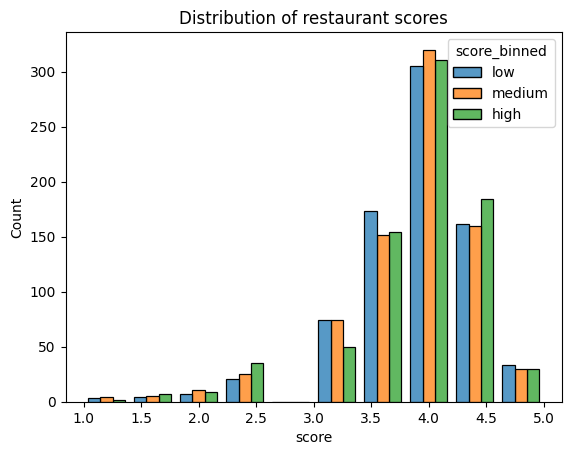

In [ ]:
sns.histplot(data=processed_df, x="score", bins = 10, multiple="dodge", hue="score_binned", shrink=.8)
plt.title("Distribution of restaurant scores")
plt.show()

In [ ]:
processed_df['review_counts'].fillna(value='', inplace=True)

In [ ]:
processed_df['review_counts'] = processed_df['review_counts'].apply(lambda x: int(x.strip(' reviews')) if x else None)

In [ ]:
review_mean = processed_df['review_counts'].mean()

# mean of values in the same column
processed_df['review_counts'].fillna(value=review_mean, inplace=True)

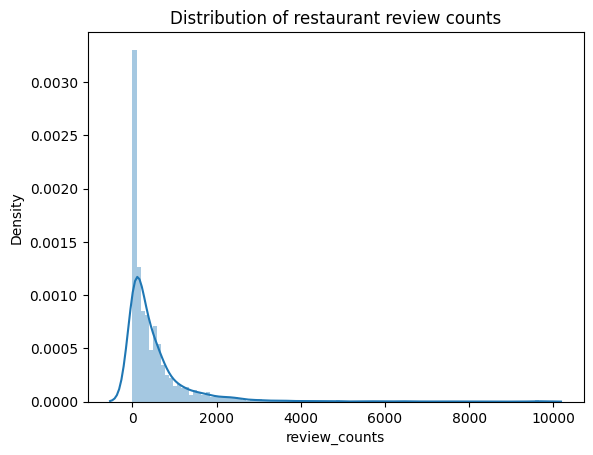

In [ ]:
sns.distplot(processed_df['review_counts'], bins = 100)
plt.title("Distribution of restaurant review counts")
plt.show()

In [ ]:
processed_df['review_counts'].describe() # outliers

count    2345.000000
mean      530.935258
std       835.987298
min         1.000000
25%        65.000000
50%       258.000000
75%       630.000000
max      9649.000000
Name: review_counts, dtype: float64

Take a look at the outliers

In [ ]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return len(outliers)/len(df)

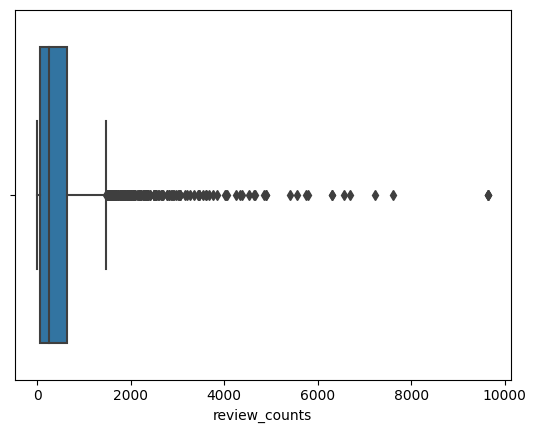

In [ ]:
sns.boxplot(data = processed_df,x = 'review_counts')
plt.show()

In [ ]:
find_outliers_IQR(processed_df['review_counts'])  # few outliers, maybe remove them later for better performance

0.088272921108742

price

In [ ]:
processed_df['price'].value_counts().keys()

Index(['$$', '$', '$$$', '$$$$'], dtype='object')

In [ ]:
# encode the price 
price_map = {'$$':1, '$':0, '$$$':2, '$$$$':3}
processed_df['price'].fillna(value='', inplace=True)
processed_df['price'] = processed_df['price'].apply(lambda x: price_map[x] if x else None)

In [ ]:
price_median = processed_df['price'].median()

# mean of values in the same column
processed_df['price'].fillna(value=price_median, inplace=True)
processed_df['price'].value_counts()

1.0    1707
0.0     468
2.0     144
3.0      26
Name: price, dtype: int64

In [ ]:
processed_df['coded_category'] = processed_df['category'].apply(lambda x: x.split(',')[0])

In [ ]:
category_list = []
for category, count in list(processed_df['coded_category'].value_counts().items()):
    if count <= 40:
        category_list.append(category)

In [ ]:
processed_df['coded_category'] = processed_df['coded_category'].apply(lambda x: 'other' if x in category_list else x)
processed_df['coded_category'].value_counts()

In [ ]:
category_df = pd.get_dummies(processed_df['coded_category'], prefix='category')
processed_df = pd.concat([processed_df, category_df], axis=1)
processed_df.head()

,FACILITY_NAME,FACILITY_ADDRESS,FACILITY_CITY,FACILITY_ID,FACILITY_STATE,FACILITY_ZIP,OWNER_ID,PE_DESCRIPTION,SCORE,VIOLATION_CODE,VIOLATION_DESCRIPTION,type,size,risk_level,ID,restaurant_id,url,name,address,score,review_counts,price,category,open_time,amenities,open_hours_week,new_address,state,zipcode,city,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,comments_list,score_binned,city_grouped,city_LOS ANGELES,coded_size,coded_risk_level,coded_category,category_American (New),category_American (Traditional),category_Bakeries,category_Barbeque,category_Breakfast & Brunch,category_Cafes,category_Chinese,category_Coffee & Tea,category_Grocery,category_Indian,category_Italian,category_Korean,category_Mediterranean,category_Mexican,category_Pizza,category_Salvadoran,category_Sandwiches,category_Seafood,category_Thai,category_other
0,#1 CAFE,2080 CENTURY PARK E STE 108,LOS ANGELES,FA0056432,CA,90067,OW0000002,RESTAURANT (0-30) SEATS HIGH RISK,90.521739,"F014,F007,F033,F036,F027,F035,F034,F049,F040,F...",# 14. Food contact surfaces: clean and sanitiz...,restaurant,0-30,HIGH,0,753,https://www.yelp.com/biz/one-cafe-los-angeles-...,One Cafe,"2080 Century Park E Los Angeles, CA 90067",3.5,7.0,1.0,Cafes,NaN,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,2080 Century Park E Los Angeles,CA,90067,Los Angeles,See all 18 photos,False,True,False,4.0,NaN,"[""Hi, it's Pauly P here dropping a bomb review...",low,LOS ANGELES,1,0.0,2.0,Cafes,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,#2 MOON BBQ,478 N WESTERN AVE,LOS ANGELES,FA0002817,CA,90004,OW0024959,RESTAURANT (61-150) SEATS HIGH RISK,91.880952,"F013,F037,F033,F044,F033,F014,F046,F035,F033,F...","# 13. Food in good condition, safe and unadult...",restaurant,61-150,HIGH,4,2526,https://www.yelp.com/biz/moon-bbq-2-los-angele...,Moon BBQ 2,"478 N Western Ave Los Angeles, CA 90004",3.0,838.0,1.0,"Korean, Barbeque",Mon\n11:00 AM - 2:00 AM (Next day)\nTue\n11:00...,Amenities and More\nHealth ScoreA\nNo Reservat...,NaN,478 N Western Ave Los Angeles,CA,90004,Los Angeles,See all 566 photos,True,True,False,19.0,See all 16 questions,"[""This is my go-to spot for cheap kbbq eats. T...",medium,LOS ANGELES,1,2.0,2.0,Korean,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,101 ASIAN KITCHEN INC,7170 BEVERLY BLVD,LOS ANGELES,FA0224563,CA,90036,OW0229023,RESTAURANT (0-30) SEATS HIGH RISK,90.894737,"F009,F052,F036,F030,F053,F037,F039,F033,F044,F...","# 09. Proper cooling methods,# 01b. Food safet...",restaurant,0-30,HIGH,15,1080,https://www.yelp.com/biz/101-asian-kitchen-los...,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036",3.5,232.0,1.0,"Chinese, Sushi Bars, Hawaiian",Mon\r\n3:00 PM - 1:00 AM (Next day)\r\nTue\r\n...,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,7170 Beverly Blvd Los Angeles,CA,90036,Los Angeles,See all 118 photos,True,True,False,16.0,NaN,"[""Hey why not get yourself some Chinese Food (...",low,LOS ANGELES,1,0.0,2.0,Chinese,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,WOK MASTER,7170 BEVERLY BLVD,LOS ANGELES,FA0175504,CA,90036,OW0182054,RESTAURANT (0-30) SEATS HIGH RISK,90.000000,"F033,F036,F037,F040,F039,F023,F004,F044",# 33. Nonfood-contact surfaces clean and in go...,restaurant,0-30,HIGH,13009,1080,https://www.yelp.com/biz/101-asian-kitchen-los...,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036",3.5,232.0,1.0,"Chinese, Sushi Bars, Hawaiian",Mon\r\n3:00 PM - 1:00 AM (Next day)\r\nTue\r\n...,Amenities and More\r\nHealth ScoreA\r\nOffers ...,NaN,7170 Beverly Blvd Los Angeles,CA,90036,Los Angeles,See all 118 photos,True,True,False,16.0,NaN,"[""Hey why not get yourself some Chinese Food (...",low,LOS ANGELES,1,0.0,2.0,Chinese,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24 HOUR FITNESS #122,5959 W CENTURY BLVD,LOS ANGELES,FA0139042,CA,90045,OW0000732,"FOOD MKT RETAIL (2,000+ SF) LOW RISK",99.000000,F033,# 33. Nonfood-contact surfaces clean and in go...,food market,"2,000+ SF",LOW,34,7523,https://www.yelp.com/biz/5959-kitchen-and-bar-...,595

In [ ]:
from datetime import datetime

def calculate_open_hours(x):
    format = '%I:%M %p'
    open_hours = 0
    
    if str(x) == 'nan':
        # print(f"{x} none")
        return None
    
    time_list = x.split('\n')
    # print(time_list)

    for t in time_list:
        try:
            # if int(t[0]):
            if 'AM' in t or 'PM' in t:
                # print(t)
                t_range = t.split('-')
                t_open = t_range[0].strip(' ')
                t_open = t_open.strip('\r')
                t_close = t_range[1].strip(' ')
                t_close = t_close.strip('\r')
                time_open = datetime.strptime(t_open, format)
                # print(time_open.time())
                time_close = datetime.strptime(t_close, format)
                # print(time_close.time())
                # print(time_close - time_open)
                open_h_day = time_close - time_open
                open_h_day = open_h_day.total_seconds()/3600  # covert to hours
                open_hours += open_h_day
        except:
            return None
    # print(open_hours)
    return open_hours

In [ ]:
processed_df['open_time'].isnull().sum()

219

In [ ]:
count = 0
for x in processed_df['open_time'].values.tolist():
    count += 1
    calculate_open_hours(x)

In [ ]:
mean_to_fill = processed_df['open_hours_week'].mean()

In [ ]:
processed_df['open_hours_week'].fillna(value=mean_to_fill, inplace=True)

In [ ]:
processed_df['open_hours_week'].describe()

count    2345.000000
mean       65.751501
std        19.134978
min         0.000000
25%        58.000000
50%        65.751501
75%        77.000000
max       133.000000
Name: open_hours_week, dtype: float64

In [ ]:
processed_df.columns

Index(['FACILITY_NAME', 'FACILITY_ADDRESS', 'FACILITY_CITY', 'FACILITY_ID',
       'FACILITY_STATE', 'FACILITY_ZIP', 'OWNER_ID', 'PE_DESCRIPTION', 'SCORE',
       'VIOLATION_CODE', 'VIOLATION_DESCRIPTION', 'type', 'size', 'risk_level',
       'ID', 'restaurant_id', 'url', 'name', 'address', 'score',
       'review_counts', 'price', 'category', 'open_time', 'amenities',
       'open_hours_week', 'new_address', 'state', 'zipcode', 'city',
       'num_photos', 'is_bus_web', 'is_phone_number', 'is_message_bus',
       'num_attributes', 'num_questions', 'comments_list', 'score_binned',
       'city_grouped', 'city_LOS ANGELES', 'coded_size', 'coded_risk_level',
       'coded_category', 'category_American (New)',
       'category_American (Traditional)', 'category_Bakeries',
       'category_Barbeque', 'category_Breakfast & Brunch', 'category_Cafes',
       'category_Chinese', 'category_Coffee & Tea', 'category_Grocery',
       'category_Indian', 'category_Italian', 'category_Korean',
      

In [ ]:
plot_features = ['violation_flag', 'type', 'coded_size', 'coded_risk_level', 'score', 'review_counts', 'price', 'SCORE', 'open_hours_week']
plot_df = processed_df[plot_features]

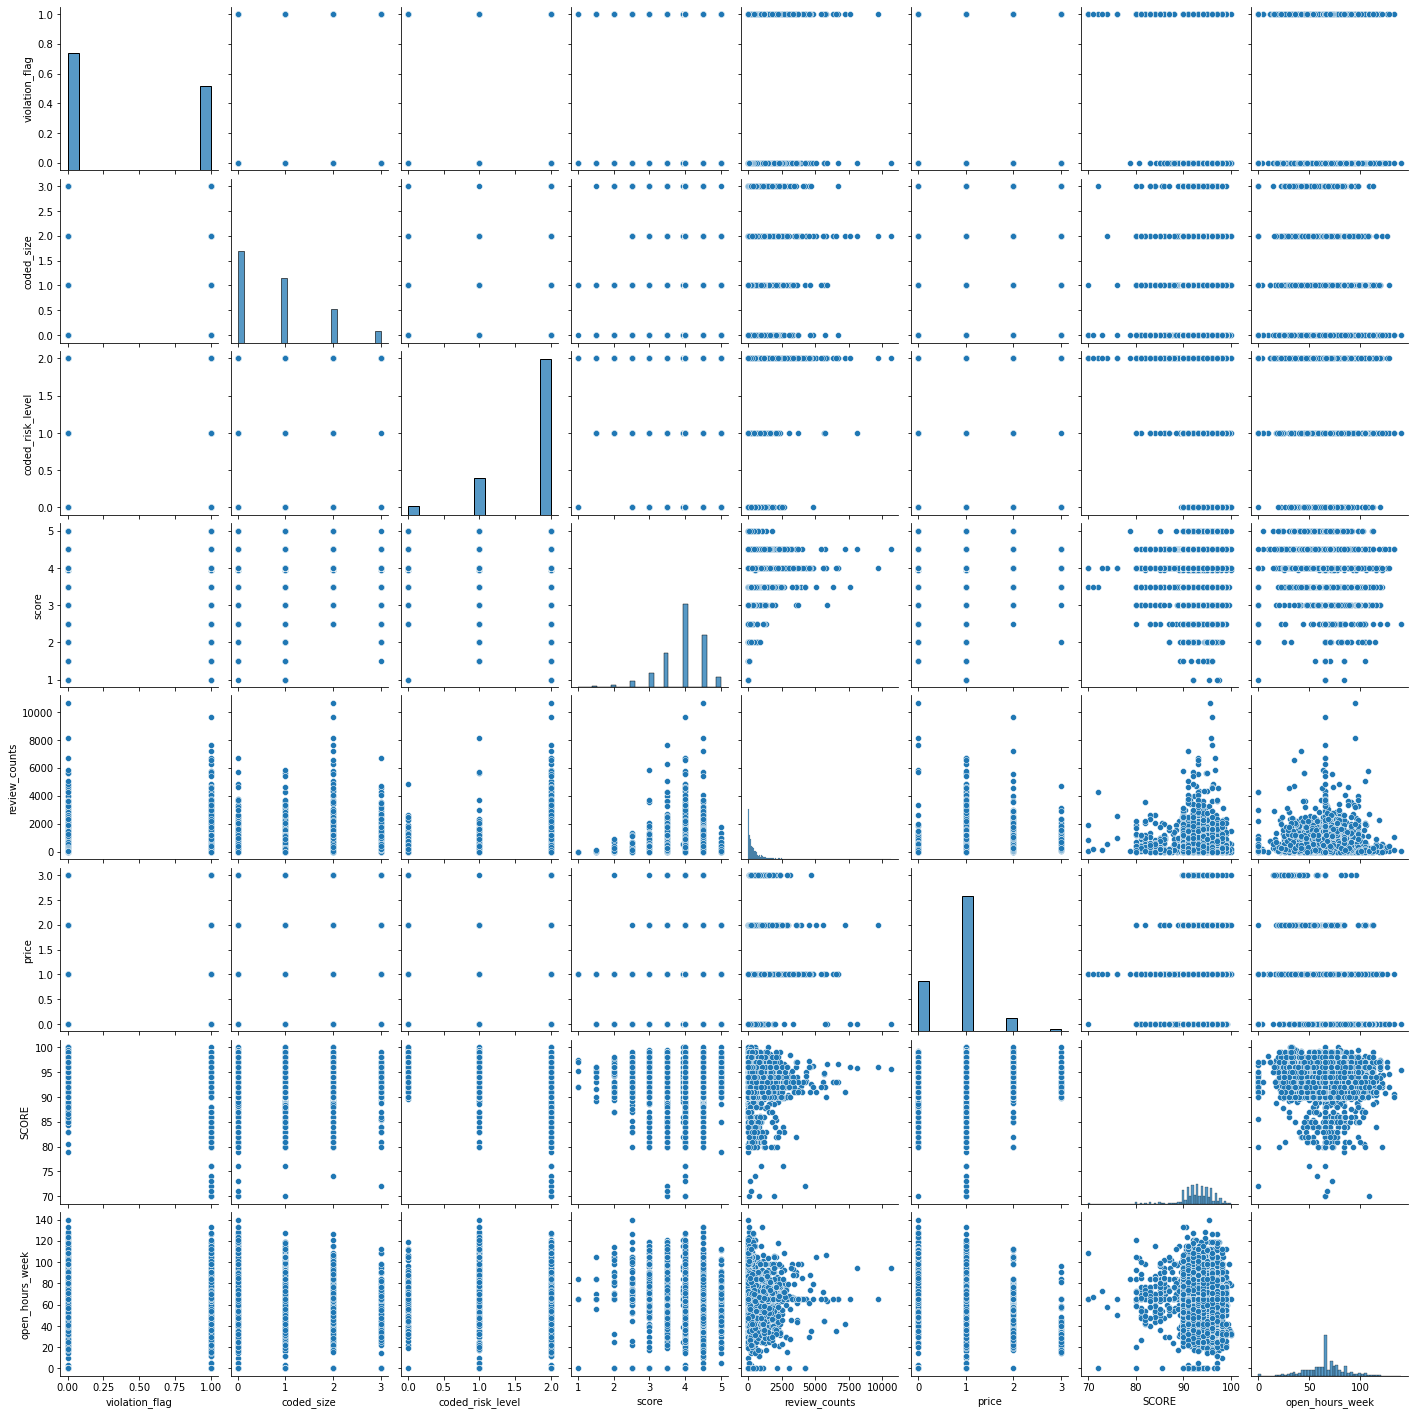

In [ ]:
sns.pairplot(plot_df)
plt.show()

In [ ]:
plot_features = ['violation_flag', 'type', 'coded_size', 'coded_risk_level', 'score', 'review_counts', 'price', 'SCORE', 'open_hours_week', 'score_binned']
plot_df = processed_df[plot_features]

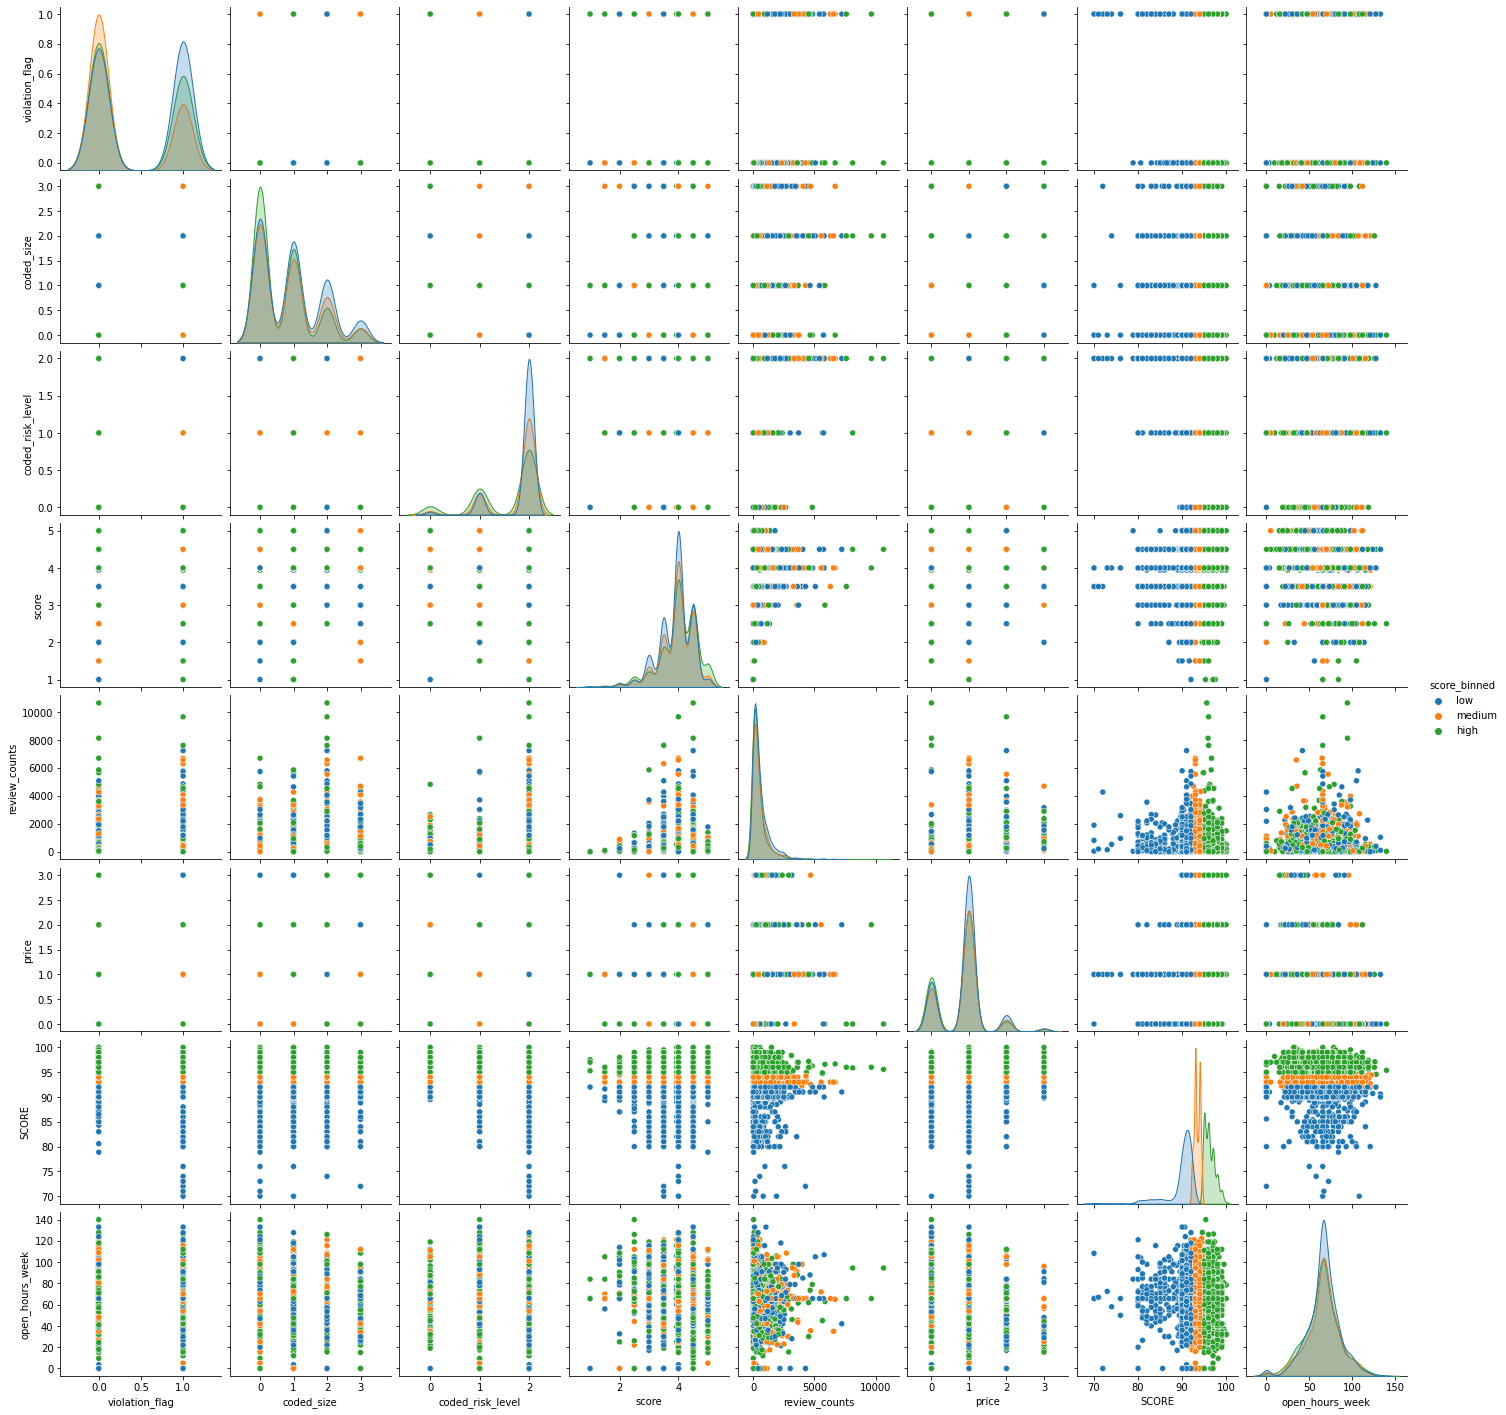

In [ ]:
sns.pairplot(plot_df, hue='score_binned')
plt.show()

In [ ]:
fig = px.scatter(data_frame=processed_df, x="score",
                 y="SCORE",
                 title="Relationship Between yelp review counts and inspection score",
                height=500,
                color = "open_hours_week",
                color_discrete_sequence = px.colors.qualitative.G10[1:])
fig.show()

### Generate the features for modeling

In [ ]:
# features = ['FACILITY_ID', 'FACILITY_NAME', 'FACILITY_ZIP', 'violation_flag', 'score', 'review_counts', 'price', 'score_binned', 'city_BEVERLY HILLS',
#        'city_CULVER CITY', 'city_INGLEWOOD', 'city_LOS ANGELES',
#        'city_MARINA DEL REY', 'city_SANTA MONICA', 'city_VENICE',
#        'city_WEST HOLLYWOOD', 'city_other', 'type_other', 'type_restaurant',
#        'coded_size', 'coded_risk_level', 
#        'category_American (New)', 'category_American (Traditional)',
#        'category_Bakeries', 'category_Barbeque', 'category_Breakfast & Brunch',
#        'category_Burgers', 'category_Cafes', 'category_Chinese',
#        'category_Coffee & Tea', 'category_Grocery',
#        'category_Ice Cream & Frozen Yogurt', 'category_Indian',
#        'category_Italian', 'category_Japanese',
#        'category_Juice Bars & Smoothies', 'category_Korean',
#        'category_Mediterranean', 'category_Mexican', 'category_Pizza',
#        'category_Salvadoran', 'category_Seafood', 'category_Thai',
#        'category_other']


# features = ['score', 'review_counts', 'price', 'score_binned', 'type_other', 'type_restaurant',
#        'coded_size', 'city_BEVERLY HILLS',
#        'city_CULVER CITY', 'city_INGLEWOOD', 'city_LOS ANGELES',
#        'city_MARINA DEL REY', 'city_SANTA MONICA', 'city_VENICE',
#        'city_WEST HOLLYWOOD', 'city_other']

# features = ['score', 'review_counts', 'price', 'score_binned', 'type_other', 'type_restaurant',
#        'coded_size']

## Load Preprocessed Features

In [3]:
model_df = pd.read_csv('/content/drive/MyDrive/DSCI 560 Project/segmentation/features_0403.csv')

In [4]:
model_df

,score,open_hours_week,binned_score,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity,binned_score_y
0,3.5,65.929481,high,0,7.0,1,18.0,0,1,0,4.0,0.0,0.252802,0.571214,2
1,3.0,65.929481,high,2,838.0,1,566.0,1,1,0,19.0,16.0,0.162304,0.538078,2
2,3.5,65.929481,high,0,232.0,1,118.0,1,1,0,16.0,0.0,0.106381,0.546583,2
3,3.5,105.000000,high,1,1966.0,1,1453.0,1,1,0,24.0,0.0,0.266286,0.544767,2
4,4.0,34.500000,high,2,2371.0,3,8236.0,1,1,0,35.0,138.0,0.335909,0.612605,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,4.0,105.000000,high,0,108.0,0,79.0,0,1,0,14.0,0.0,0.190191,0.527381,2
1344,3.5,65.929481,high,2,1169.0,1,368.0,1,1,0,22.0,4.0,0.148343,0.559464,2
1345,4.0,84.000000,high,1,503.0,1,409.0,1,1,1,22.0,4.0,0.209066,0.555084,2
1346,4.0,89.000000,high,0,283.0,0,183.0,0,1,1,18.0,0.0,0.181992,0.497467,2


In [5]:
X_df = model_df.copy(deep=True)

In [6]:
X_df

,score,open_hours_week,binned_score,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity,binned_score_y
0,3.5,65.929481,high,0,7.0,1,18.0,0,1,0,4.0,0.0,0.252802,0.571214,2
1,3.0,65.929481,high,2,838.0,1,566.0,1,1,0,19.0,16.0,0.162304,0.538078,2
2,3.5,65.929481,high,0,232.0,1,118.0,1,1,0,16.0,0.0,0.106381,0.546583,2
3,3.5,105.000000,high,1,1966.0,1,1453.0,1,1,0,24.0,0.0,0.266286,0.544767,2
4,4.0,34.500000,high,2,2371.0,3,8236.0,1,1,0,35.0,138.0,0.335909,0.612605,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,4.0,105.000000,high,0,108.0,0,79.0,0,1,0,14.0,0.0,0.190191,0.527381,2
1344,3.5,65.929481,high,2,1169.0,1,368.0,1,1,0,22.0,4.0,0.148343,0.559464,2
1345,4.0,84.000000,high,1,503.0,1,409.0,1,1,1,22.0,4.0,0.209066,0.555084,2
1346,4.0,89.000000,high,0,283.0,0,183.0,0,1,1,18.0,0.0,0.181992,0.497467,2


In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### KMEANS
The features must be numerical.
The features you're fitting into KMeans must be normally distributed. This is because KMeans (since it calculates average distance) is affected by outliers (values that deviate a lot from the others). As a result, any skewed feature must be changed in order to be normally distributed. Fortunately, we can use Numpy's logarithm transformation package np.log()
The features must also be of the same scale. For this, we'll use the Scikit-learn StandardScaler() module.

In [ ]:
X_df

,score,open_hours_week,binned_score,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity,binned_score_y
0,3.5,65.929481,high,0,7.0,1,18.0,0,1,0,4.0,0.0,0.252802,0.571214,2
1,3.0,65.929481,high,2,838.0,1,566.0,1,1,0,19.0,16.0,0.162304,0.538078,2
2,3.5,65.929481,high,0,232.0,1,118.0,1,1,0,16.0,0.0,0.106381,0.546583,2
3,3.5,105.000000,high,1,1966.0,1,1453.0,1,1,0,24.0,0.0,0.266286,0.544767,2
4,4.0,34.500000,high,2,2371.0,3,8236.0,1,1,0,35.0,138.0,0.335909,0.612605,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,4.0,105.000000,high,0,108.0,0,79.0,0,1,0,14.0,0.0,0.190191,0.527381,2
1344,3.5,65.929481,high,2,1169.0,1,368.0,1,1,0,22.0,4.0,0.148343,0.559464,2
1345,4.0,84.000000,high,1,503.0,1,409.0,1,1,1,22.0,4.0,0.209066,0.555084,2
1346,4.0,89.000000,high,0,283.0,0,183.0,0,1,1,18.0,0.0,0.181992,0.497467,2


In [128]:
# read the raw features
X_raw = pd.read_csv('/content/drive/MyDrive/DSCI 560 Project/segmentation/features_for_segmentation_0403.csv')
X_raw

,restaurant_id,url,FACILITY_NAME,name,address,score,review_counts,price,category,open_time,amenities,open_hours_week,new_address,state,zipcode,city,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,comments_list,binned_score,coded_size,coded_review_counts,coded_price,polarity,subjectivity,size
0,753,https://www.yelp.com/biz/one-cafe-los-angeles-...,#1 CAFE,One Cafe,"2080 Century Park E Los Angeles, CA 90067",3.5,7 reviews,$$,Cafes,NaN,Amenities and More\r\nHealth ScoreA\r\nOffers ...,65.929481,2080 Century Park E Los Angeles,CA,90067,Los Angeles,18.0,0,1,0,4.0,0.0,"[""Hi, it's Pauly P here dropping a bomb review...",high,0,7.0,1,0.252802,0.571214,0-30
1,2526,https://www.yelp.com/biz/moon-bbq-2-los-angele...,#2 MOON BBQ,Moon BBQ 2,"478 N Western Ave Los Angeles, CA 90004",3.0,838 reviews,$$,"Korean, Barbeque",Mon\n11:00 AM - 2:00 AM (Next day)\nTue\n11:00...,Amenities and More\nHealth ScoreA\nNo Reservat...,65.929481,478 N Western Ave Los Angeles,CA,90004,Los Angeles,566.0,1,1,0,19.0,16.0,"[""This is my go-to spot for cheap kbbq eats. T...",high,2,838.0,1,0.162304,0.538078,61-150
2,1080,https://www.yelp.com/biz/101-asian-kitchen-los...,101 ASIAN KITCHEN INC,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036",3.5,232 reviews,$$,"Chinese, Sushi Bars, Hawaiian",Mon\r\n3:00 PM - 1:00 AM (Next day)\r\nTue\r\n...,Amenities and More\r\nHealth ScoreA\r\nOffers ...,65.929481,7170 Beverly Blvd Los Angeles,CA,90036,Los Angeles,118.0,1,1,0,16.0,0.0,"[""Hey why not get yourself some Chinese Food (...",high,0,232.0,1,0.106381,0.546583,0-30
3,1790,https://www.yelp.com/biz/25-degrees-los-angele...,25 DEGREES,25 Degrees,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,3.5,1966 reviews,$$,"Burgers, Diners, American (Traditional)",Mon\n7:00 AM - 10:00 PM\nTue\n7:00 AM - 10:00 ...,Amenities and More\nHealth ScoreA\nOffers Deli...,105.000000,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...,CA,90028,Los Angeles,1453.0,1,1,0,24.0,0.0,"[""Glad to see this old Hollywood style diner s...",high,1,1966.0,1,0.266286,0.544767,31-60
4,1880,https://www.yelp.com/biz/71-above-los-angeles-...,71 ABOVE,71 Above,"633 W 5th St Fl 71 Los Angeles, CA 90071",4.0,2371 reviews,$$$$,"American (Traditional), Cocktail Bars",Mon\n5:00 PM - 9:30 PM\nTue\n5:00 PM - 9:30 PM...,Amenities and More\nTakes Reservations\nBy App...,34.500000,633 W 5th St Fl 71 Los Angeles,CA,90071,Los Angeles,8236.0,1,1,0,35.0,138.0,"['Great food, great ambiance and views. Overal...",high,2,2371.0,3,0.335909,0.612605,151 +
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,3832,https://www.yelp.com/biz/zamora-brothers-los-a...,ZAMORA BROS. MEAT MARKET,Zamora Brothers,"1559 W Pico Blvd Los Angeles, CA 90015",4.0,108 reviews,$,"Meat Shops, Mexican",Mon\n6:00 AM - 9:00 PM\nTue\n6:00 AM - 9:00 PM...,Amenities and More\nHealth ScoreA\nOffers Deli...,105.000000,1559 W Pico Blvd Los Angeles,CA,90015,Los Angeles,79.0,0,1,0,14.0,0.0,"['Came across this place on tik tok, finally h...",high,0,108.0,0,0.190191,0.527381,0-30
1344,3184,https://www.yelp.com/biz/zankou-chicken-hollyw...,ZANKOU CHICKEN,Zankou Chicken - Hollywood,"5065 W Sunset Blvd Los Angeles, CA 90027",3.5,1169 reviews,$$,Mediterranean,Mon\n10:00 AM - 12:00 AM (Next day)\nTue\n10:0...,Amenities and More\nHealth ScoreA\nOffers Deli...,65.929481,5065 W Sunset Blvd Los Angeles,CA,90027,Los Angeles,368.0,1,1,0,22.0,4.0,"[""I love this place cause the service is alwa...",high,2,1169.0,1,0.148343,0.559464,61-150
1345,3490,https://www.yelp.com/biz/zankou-chicken-los-an...,ZANKOU CHICKEN,Zankou Chicken,"7851 W Sunset Blvd Los Angeles, CA 90046",4.0,503 reviews,$$,"Mediterranean, Salad, Wraps",Mon\n10:00 AM - 10:00 PM\nTue\n10:00 AM - 10:0...,Amenities and More\nHealth ScoreA\nOffers Deli...,84.000000,7851 W Sunset Blvd Los Angeles,CA,90046,Los Angeles,409.0,1,1,1,22.0,4.0,"[""Came into Zankou around 930 wasn't too sure ...",high,1,503.0,

In [9]:
# standardize
std_scaler = StandardScaler()
std_df = pd.DataFrame(std_scaler.fit_transform(X_df.drop(columns=['binned_score','binned_score_y'])), columns=X_df.drop(columns=['binned_score','binned_score_y']).columns)

In [10]:
std_df

,score,open_hours_week,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity
0,-0.612669,0.000000,-0.980847,-0.679453,0.265593,-0.500002,-1.869046,0.134636,-0.393826,-2.379669,-0.334925,0.438227,0.207423
1,-1.489398,0.000000,1.427498,0.172470,0.265593,-0.131053,0.535032,0.134636,-0.393826,-0.320401,0.614558,-0.522348,-0.247213
2,-0.612669,0.000000,-0.980847,-0.448788,0.265593,-0.432676,0.535032,0.134636,-0.393826,-0.732254,-0.334925,-1.115933,-0.130534
3,-0.612669,1.978132,0.223326,1.328872,0.265593,0.466132,0.535032,0.134636,-0.393826,0.366022,-0.334925,0.581343,-0.155440
4,0.264059,-1.591268,1.427498,1.744069,3.643138,5.032883,0.535032,0.134636,-0.393826,1.876153,7.854370,1.320346,0.775320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,0.264059,1.978132,-0.980847,-0.575910,-1.423179,-0.458933,-1.869046,0.134636,-0.393826,-1.006823,-0.334925,-0.226351,-0.393990
1344,-0.612669,0.000000,1.427498,0.511804,0.265593,-0.264360,0.535032,0.134636,-0.393826,0.091453,-0.097555,-0.670532,0.046206
1345,0.264059,0.914906,0.223326,-0.170965,0.265593,-0.236756,0.535032,0.134636,2.539196,0.091453,-0.097555,-0.026008,-0.013895
1346,0.264059,1.168055,-0.980847,-0.396504,-1.423179,-0.388913,-1.869046,0.134636,2.539196,-0.457685,-0.334925,-0.313376,-0.804423


### Modeling

In [ ]:
y_df = X_df.binned_score
y_df

0       high
1       high
2       high
3       high
4       high
        ... 
1343    high
1344    high
1345    high
1346    high
1347    high
Name: binned_score, Length: 1348, dtype: object

In [ ]:
std_df.columns

Index(['score', 'open_hours_week', 'coded_size', 'coded_review_counts',
       'coded_price', 'num_photos', 'is_bus_web', 'is_phone_number',
       'is_message_bus', 'num_attributes', 'num_questions', 'polarity',
       'subjectivity'],
      dtype='object')

In [ ]:
cluster_df_scaled = std_df.copy(deep=True)
cluster_df_scaled

,score,open_hours_week,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity
0,-0.612669,0.000000,-0.980847,-0.679453,0.265593,-0.500002,-1.869046,0.134636,-0.393826,-2.379669,-0.334925,0.438227,0.207423
1,-1.489398,0.000000,1.427498,0.172470,0.265593,-0.131053,0.535032,0.134636,-0.393826,-0.320401,0.614558,-0.522348,-0.247213
2,-0.612669,0.000000,-0.980847,-0.448788,0.265593,-0.432676,0.535032,0.134636,-0.393826,-0.732254,-0.334925,-1.115933,-0.130534
3,-0.612669,1.978132,0.223326,1.328872,0.265593,0.466132,0.535032,0.134636,-0.393826,0.366022,-0.334925,0.581343,-0.155440
4,0.264059,-1.591268,1.427498,1.744069,3.643138,5.032883,0.535032,0.134636,-0.393826,1.876153,7.854370,1.320346,0.775320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,0.264059,1.978132,-0.980847,-0.575910,-1.423179,-0.458933,-1.869046,0.134636,-0.393826,-1.006823,-0.334925,-0.226351,-0.393990
1344,-0.612669,0.000000,1.427498,0.511804,0.265593,-0.264360,0.535032,0.134636,-0.393826,0.091453,-0.097555,-0.670532,0.046206
1345,0.264059,0.914906,0.223326,-0.170965,0.265593,-0.236756,0.535032,0.134636,2.539196,0.091453,-0.097555,-0.026008,-0.013895
1346,0.264059,1.168055,-0.980847,-0.396504,-1.423179,-0.388913,-1.869046,0.134636,2.539196,-0.457685,-0.334925,-0.313376,-0.804423


In [ ]:
cluster_df_scaled.isnull().sum()

score                  0
open_hours_week        0
coded_size             0
coded_review_counts    0
coded_price            0
num_photos             0
is_bus_web             0
is_phone_number        0
is_message_bus         0
num_attributes         0
num_questions          0
polarity               0
subjectivity           0
dtype: int64

In [ ]:
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=2009)
    model.fit(cluster_df_scaled)
    errors.append(model.inertia_)

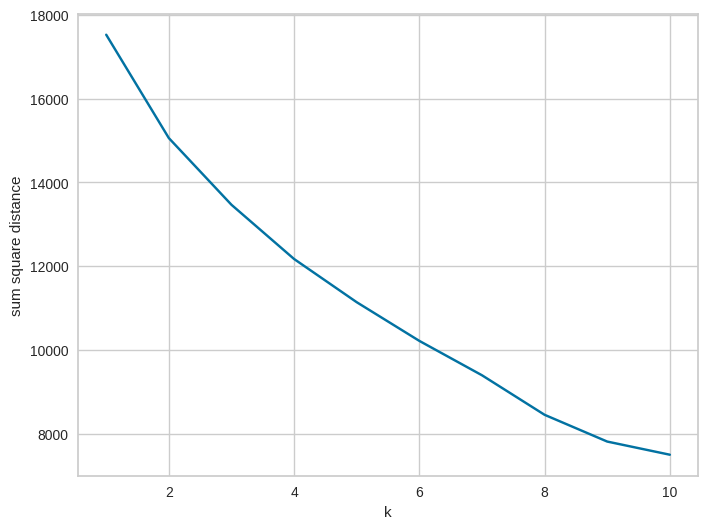

In [ ]:
fig = plt.figure(figsize = (8,6))
plt.plot(range(1,11), errors)
plt.xlabel('k')
plt.ylabel('sum square distance')
plt.show()

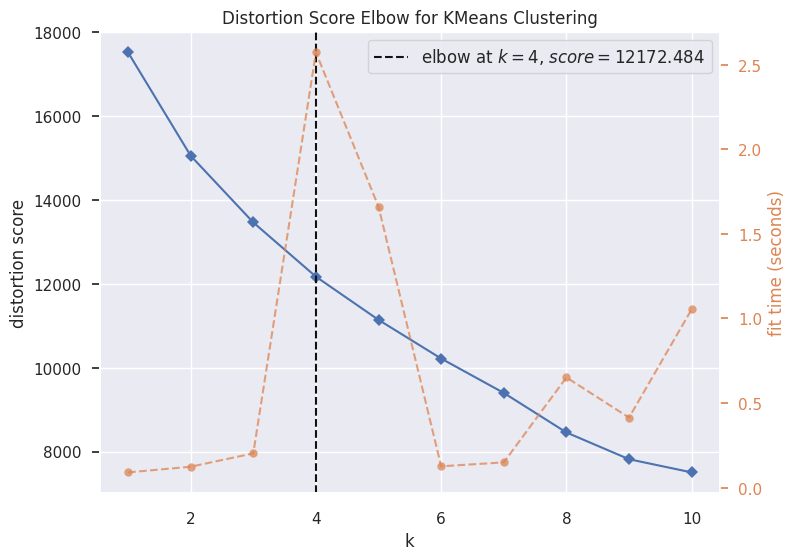

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# use scree plot
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=2009)
X = np.array(std_df)
visualizer = KElbowVisualizer(model, k=(1,11)).fit(X)
visualizer.show()

In [ ]:
visualizer.elbow_value_ # Get elbow value

4

For n_clusters = 2 The average silhouette_score is : 0.14284197074715257
For n_clusters = 3 The average silhouette_score is : 0.16775722411984806
For n_clusters = 4 The average silhouette_score is : 0.19977835938308616
For n_clusters = 5 The average silhouette_score is : 0.17287289397979624
For n_clusters = 6 The average silhouette_score is : 0.17901934043887371
For n_clusters = 7 The average silhouette_score is : 0.18827279801773794


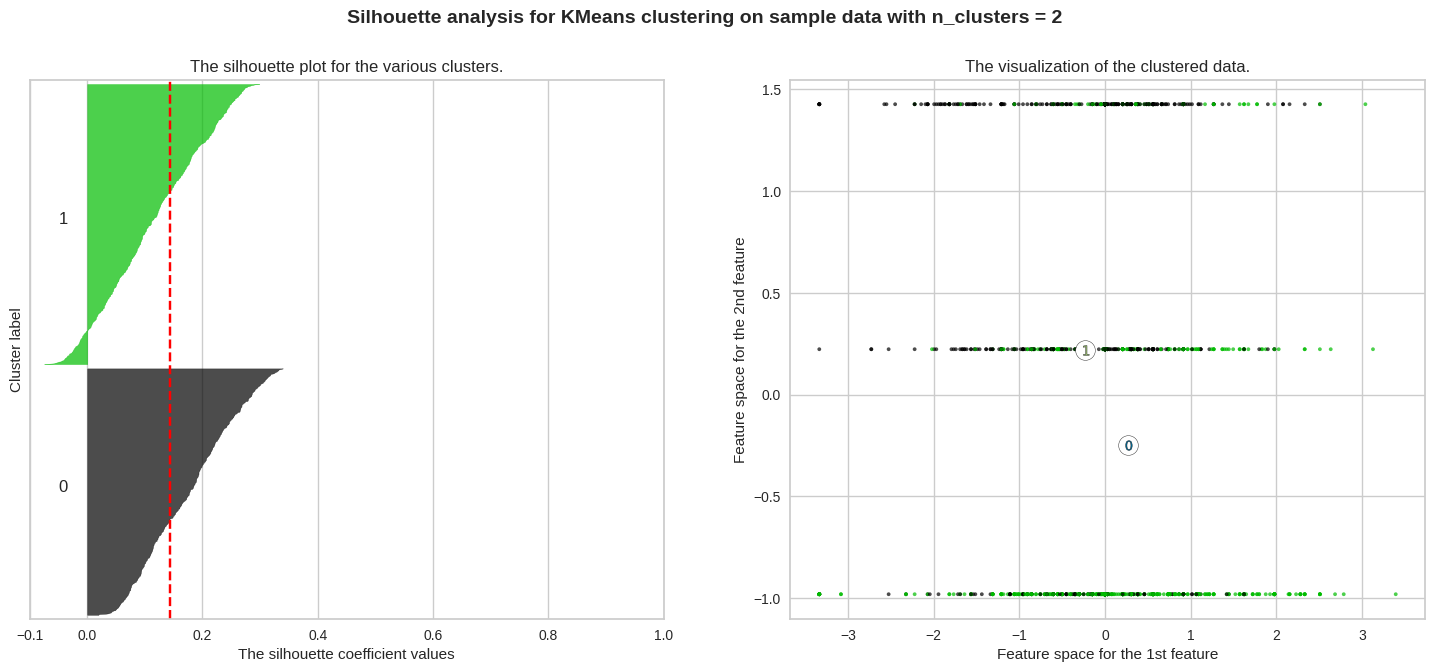

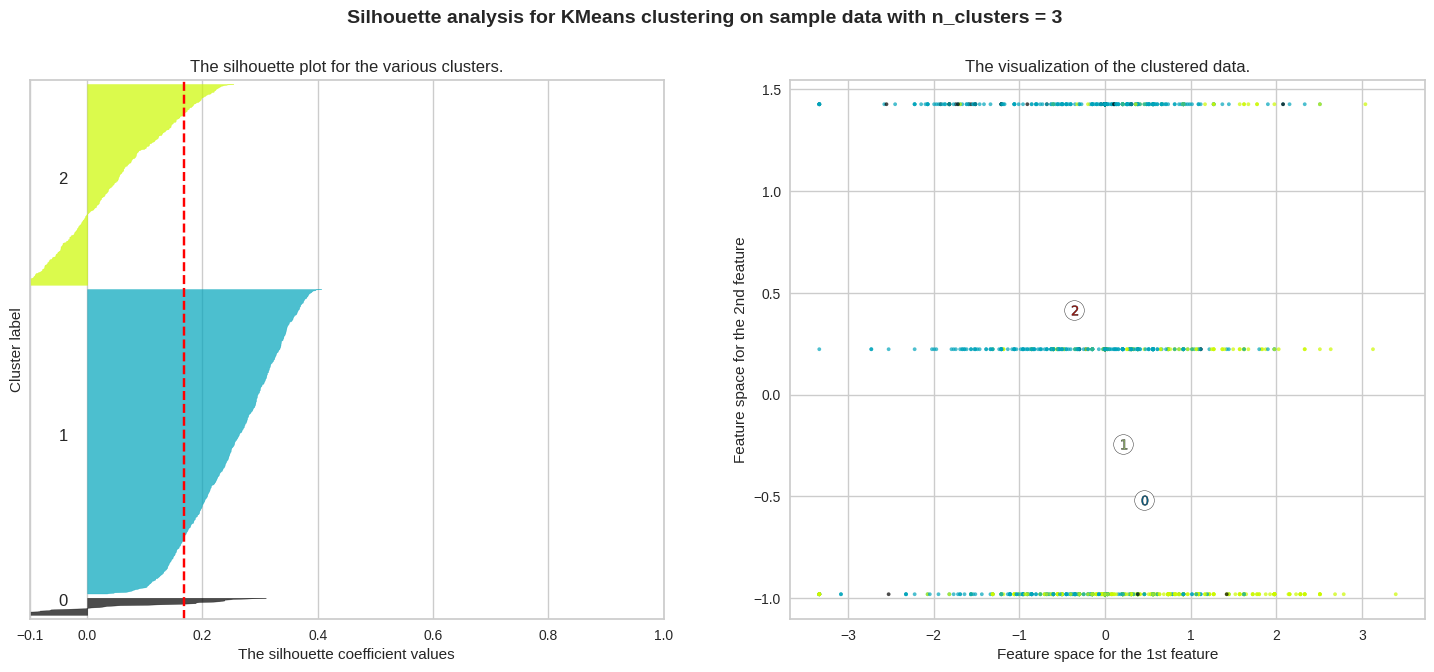

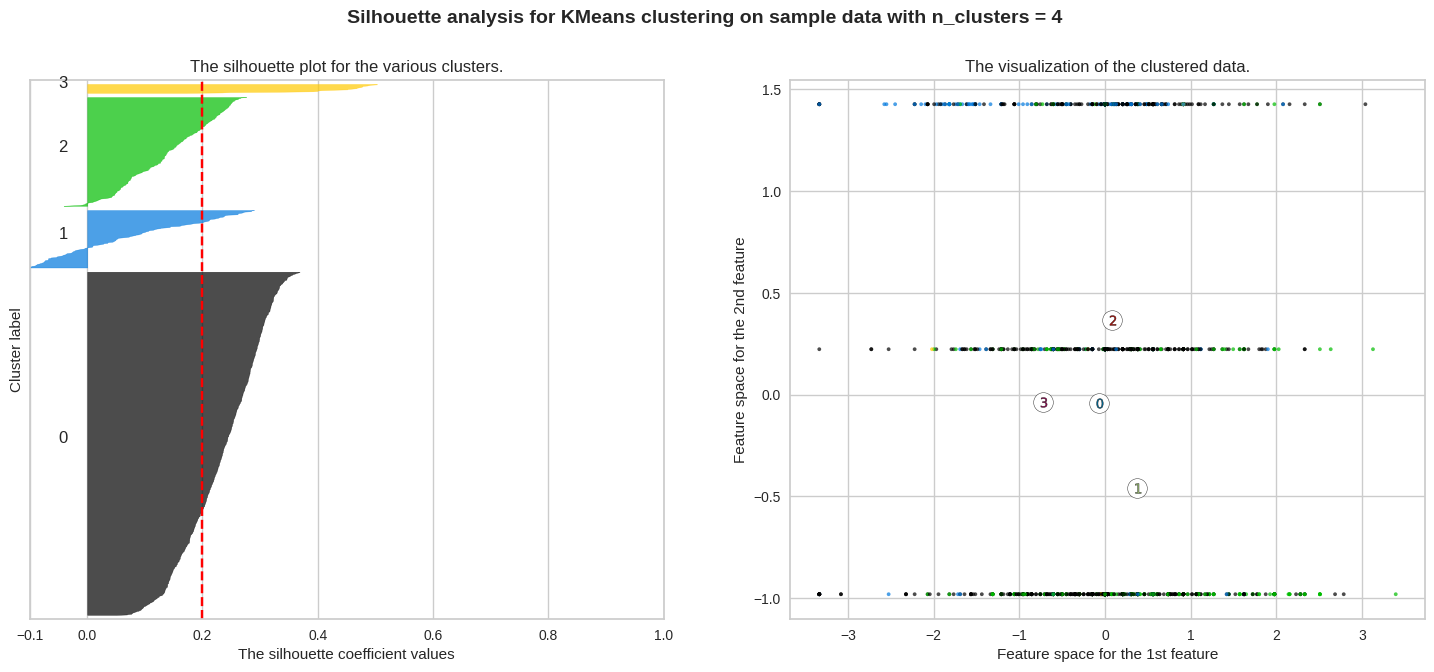

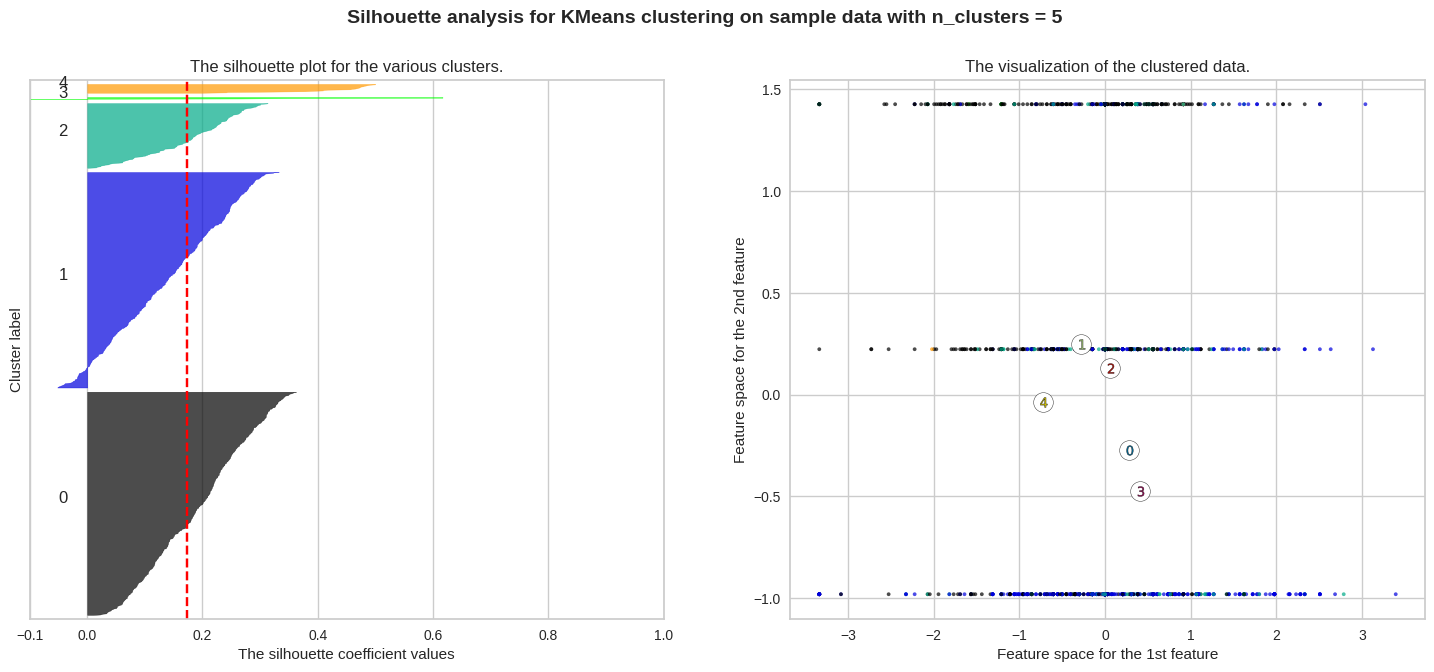

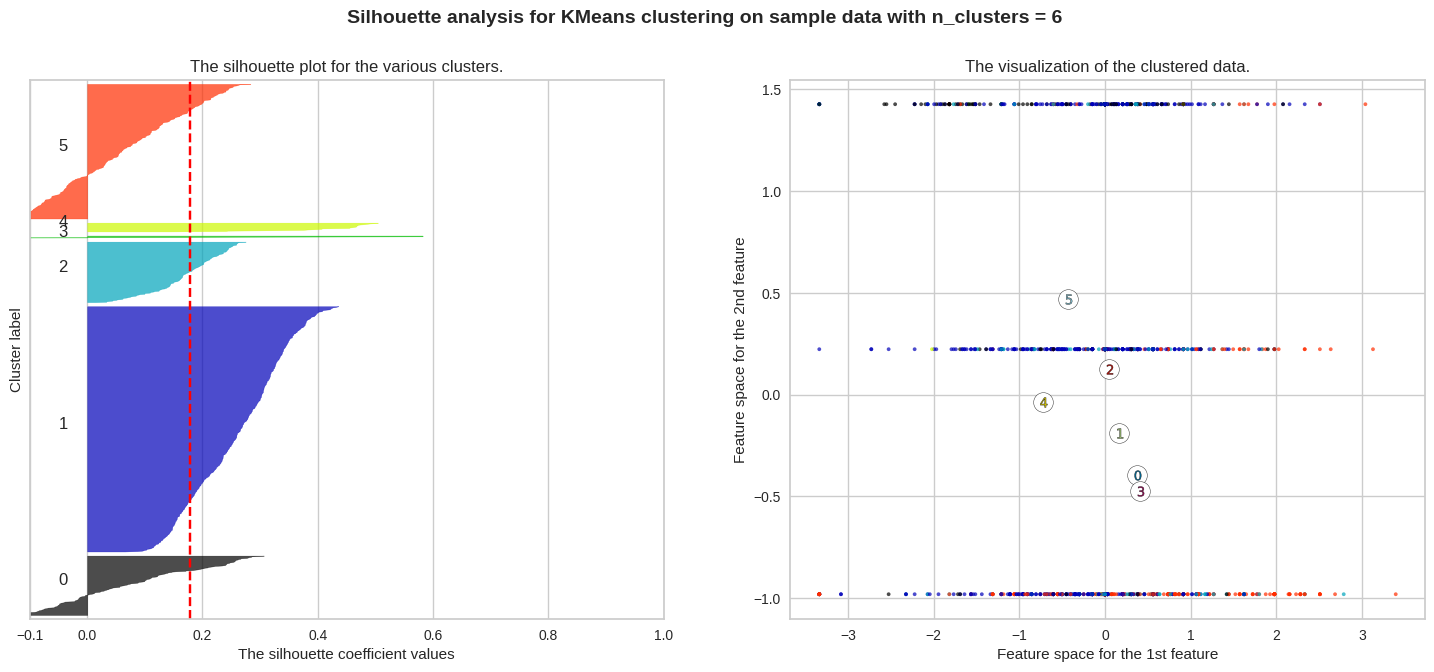

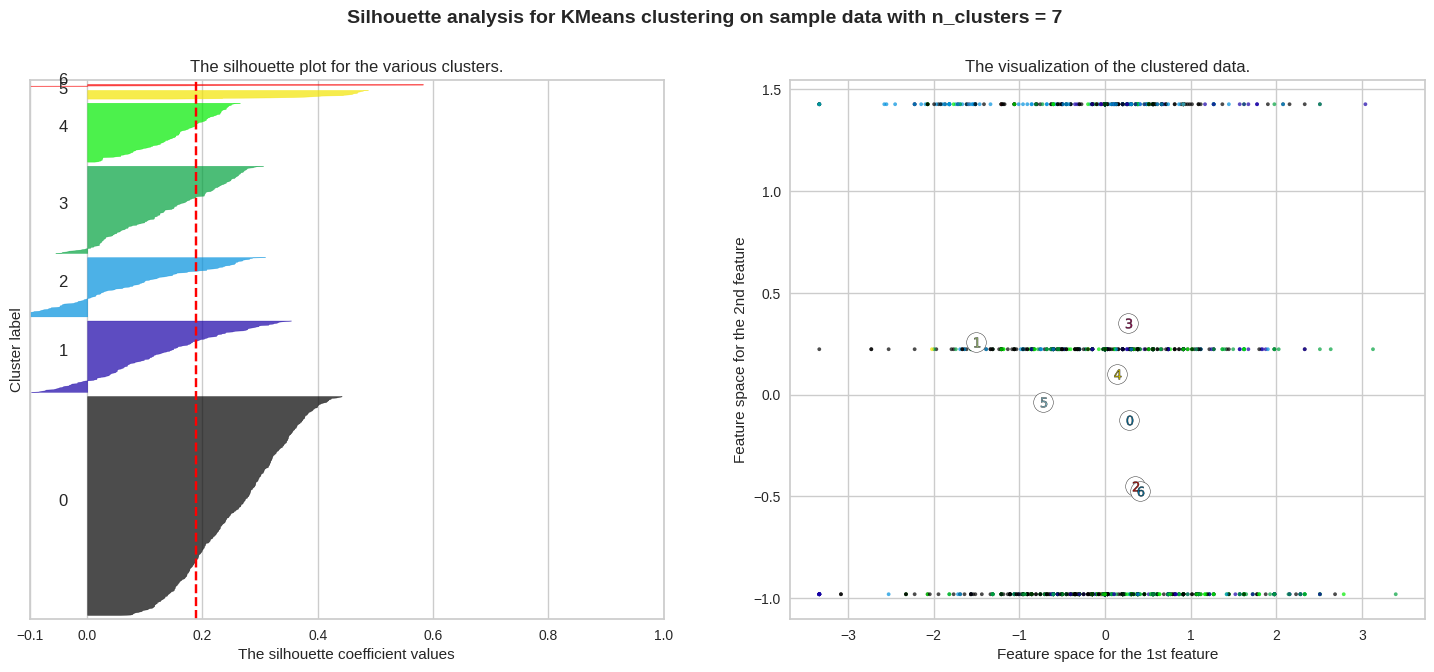

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

X = cluster_df_scaled
for n_clusters in [2,3,4,5,6,7]:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 1], X.iloc[:, 2], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
model = KMeans(n_clusters=4, random_state=2009)
model.fit(std_df)

KMeans(n_clusters=4, random_state=2009)

In [ ]:
labels = model.labels_
labels

array([0, 3, 0, ..., 3, 0, 3], dtype=int32)

In [ ]:
cluster_df_scaled['segment'] = labels

In [ ]:
cluster_df_scaled.head()

,score,open_hours_week,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity,segment,raw_score,raw_review_counts,raw_price,raw_size,raw_open_hour,binned_score
0,-0.612669,0.000000,-0.980847,-0.679453,0.265593,-0.500002,-1.869046,0.134636,-0.393826,-2.379669,-0.334925,0.438227,0.207423,0,3.5,7.0,1,0,65.929481,high
1,-1.489398,0.000000,1.427498,0.172470,0.265593,-0.131053,0.535032,0.134636,-0.393826,-0.320401,0.614558,-0.522348,-0.247213,3,3.0,838.0,1,2,65.929481,high
2,-0.612669,0.000000,-0.980847,-0.448788,0.265593,-0.432676,0.535032,0.134636,-0.393826,-0.732254,-0.334925,-1.115933,-0.130534,0,3.5,232.0,1,0,65.929481,high
3,-0.612669,1.978132,0.223326,1.328872,0.265593,0.466132,0.535032,0.134636,-0.393826,0.366022,-0.334925,0.581343,-0.155440,3,3.5,1966.0,1,1,105.000000,high
4,0.264059,-1.591268,1.427498,1.744069,3.643138,5.032883,0.535032,0.134636,-0.393826,1.876153,7.854370,1.320346,0.775320,1,4.0,2371.0,3,2,34.500000,high


In [ ]:
X_df

,score,open_hours_week,binned_score,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity,binned_score_y,clusters,comments_list
0,3.5,65.929481,high,0,7.0,1,18.0,0,1,0,4.0,0.0,0.252802,0.571214,2,1,"[""Hi, it's Pauly P here dropping a bomb review..."
1,3.0,65.929481,high,2,838.0,1,566.0,1,1,0,19.0,16.0,0.162304,0.538078,2,2,"[""This is my go-to spot for cheap kbbq eats. T..."
2,3.5,65.929481,high,0,232.0,1,118.0,1,1,0,16.0,0.0,0.106381,0.546583,2,2,"[""Hey why not get yourself some Chinese Food (..."
3,3.5,105.000000,high,1,1966.0,1,1453.0,1,1,0,24.0,0.0,0.266286,0.544767,2,3,"[""Glad to see this old Hollywood style diner s..."
4,4.0,34.500000,high,2,2371.0,3,8236.0,1,1,0,35.0,138.0,0.335909,0.612605,2,0,"['Great food, great ambiance and views. Overal..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,4.0,105.000000,high,0,108.0,0,79.0,0,1,0,14.0,0.0,0.190191,0.527381,2,1,"['Came across this place on tik tok, finally h..."
1344,3.5,65.929481,high,2,1169.0,1,368.0,1,1,0,22.0,4.0,0.148343,0.559464,2,3,"[""I love this place cause the service is alwa..."
1345,4.0,84.000000,high,1,503.0,1,409.0,1,1,1,22.0,4.0,0.209066,0.555084,2,3,"[""Came into Zankou around 930 wasn't too sure ..."
1346,4.0,89.000000,high,0,283.0,0,183.0,0,1,1,18.0,0.0,0.181992,0.497467,2,1,['Awesome breakfast burrito and super nice/fri...


In [ ]:
# 'score', 'price', 'coded_size', 'coded_risk_level', 'review_counts'
cluster_df_scaled['raw_score'] = X_df['score']
cluster_df_scaled['raw_review_counts'] = X_df['coded_review_counts']
cluster_df_scaled['raw_price'] = X_df['coded_price']
cluster_df_scaled['raw_size'] = X_df['coded_size']
cluster_df_scaled['raw_open_hour'] = X_df['open_hours_week']
cluster_df_scaled['binned_score'] = X_df.binned_score

In [ ]:
desc = cluster_df_scaled.groupby('segment').describe()
cluster_means = {x: desc[(x, 'mean')].values for x in cluster_df_scaled.columns if x not in ['segment', 'binned_score']}

In [ ]:
desc

score                                                              \
         count      mean       std       min       25%       50%       75%   
segment                                                                      
0        503.0 -0.345990  1.201282 -4.996311 -0.612669  0.264059  0.264059   
1         44.0  0.483241  0.467949 -0.612669  0.264059  0.264059  1.140787   
2         24.0 -0.722260  1.375641 -4.119583 -1.489398 -0.612669  0.264059   
3        777.0  0.218925  0.761835 -3.242854  0.264059  0.264059  0.264059   

                  open_hours_week                                          \
              max           count      mean       std       min       25%   
segment                                                                     
0        2.017516           503.0  0.426972  0.984002 -3.337995  0.000000   
1        1.140787            44.0 -0.531642  1.179305 -3.337995 -1.527981   
2        2.017516            24.0 -0.034375  0.505371 -2.021621  0.000000   
3        2.017516           777.0 -0.245237  0.911950 -3.337995 -0.705247   

                                      coded_size                      \
              50%       75%       max      count      mean       std   
segment                                                                
0        0.307349  0.914906  3.395766      503.0 -0.573870  0.714109   
1        0.000000  0.000000  2.079391       44.0  0.934882  0.873691   
2        0.000000  0.000000  0.914906       24.0 -0.027544  1.121726   
3        0.000000  0.307349  2.509744      777.0  0.319412  0.981033   

                                                          coded_review_counts  \
              min       25%       50%       75%       max               count   
segment                                                                         
0       -0.980847 -0.980847 -0.980847  0.223326  1.427498               503.0   
1       -0.980847  0.223326  1.427498  1.427498  1.427498                44.0   
2       -0.980847 -0.980847 -0.980847  1.427498  1.427498                24.0   
3       -0.980847 -0.980847  0.223326  1.427498  1.427498               777.0   

                                                                               \
             mean       std       min       25%       50%       75%       max   
segment                                                                         
0       -0.490560  0.252674 -0.685604 -0.649723 -0.585137 -0.428285  1.633350   
1        3.635245  2.252955  0.222704  2.167212  3.045534  4.891624  9.205320   
2       -0.105971  1.350243 -0.684579 -0.681504 -0.563608 -0.208956  5.774047   
3        0.114986  0.664556 -0.685604 -0.358572 -0.058195  0.404161  3.245956   

        coded_price                                                    \
              count      mean       std       min       25%       50%   
segment                                                                 
0             503.0 -0.671121  0.873315 -1.423179 -1.423179 -1.423179   
1              44.0  0.994836  1.282398 -1.423179  0.265593  0.265593   
2              24.0 -0.086234  0.859547 -1.423179 -0.156600  0.265593   
3             777.0  0.380786  0.798263 -1.423179  0.265593  0.265593   

                            num_photos                                \
              75%       max      count      mean       std       min   
segment                                                                
0        0.265593  3.643138      503.0 -0.405626  0.164542 -0.512121   
1        1.954366  3.643138       44.0  3.923344  2.698354  1.035714   
2        0.265593  1.954366       24.0 -0.265229  0.497447 -0.512121   
3        0.265593  3.643138      777.0  0.048608  0.569941 -0.512121   

                                                 is_bus_web            \
              25%       50%       75%        max      count      mean   
segment                                                                 
0       -0.490240 -0.456913 -0.393963   1.222

In [ ]:
cluster_df_scaled.columns

Index(['score', 'open_hours_week', 'coded_size', 'coded_review_counts',
       'coded_price', 'num_photos', 'is_bus_web', 'is_phone_number',
       'is_message_bus', 'num_attributes', 'num_questions', 'polarity',
       'subjectivity', 'segment', 'raw_score', 'raw_review_counts',
       'raw_price', 'raw_size', 'raw_open_hour', 'binned_score'],
      dtype='object')

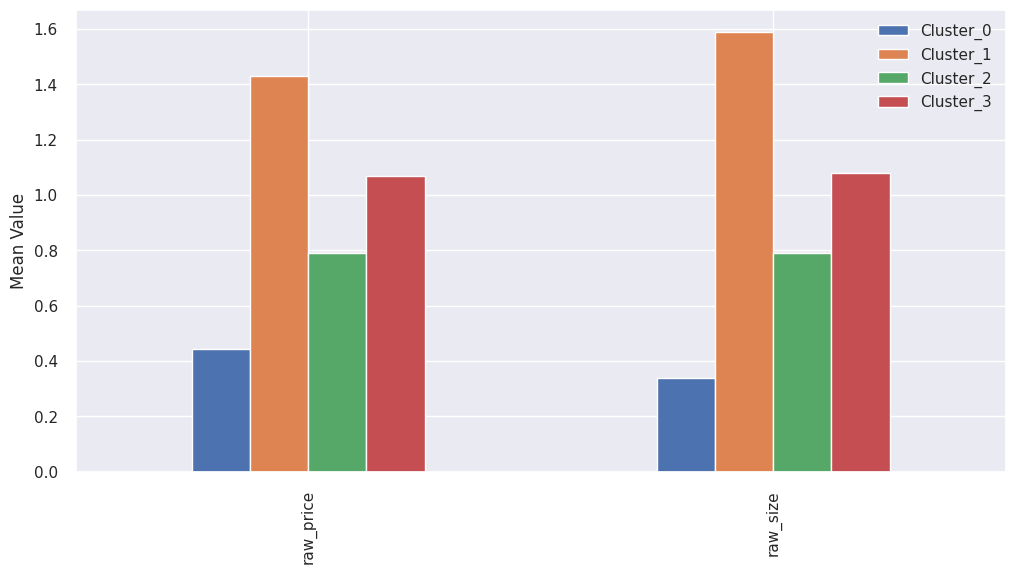

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
cm = pd.DataFrame(cluster_means)
cm.index = [f'Cluster_{x}' for x in cm.index]
cm[['raw_price', 'raw_size']].T.plot.bar(ax=ax)
plt.ylabel('Mean Value')
plt.show()

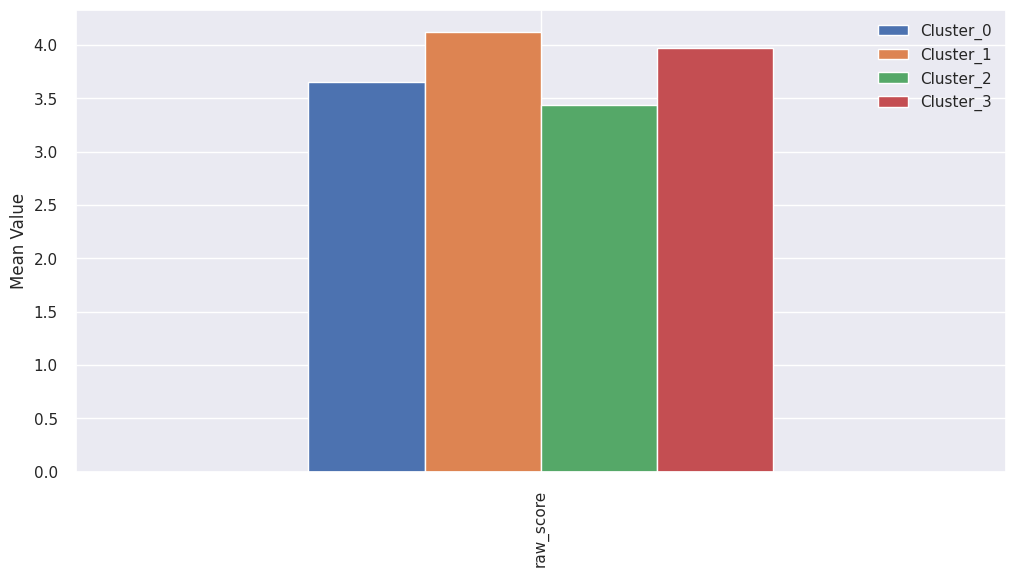

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
cm = pd.DataFrame(cluster_means)
cm.index = [f'Cluster_{x}' for x in cm.index]
cm[['raw_score']].T.plot.bar(ax=ax)
plt.ylabel('Mean Value')
plt.show()

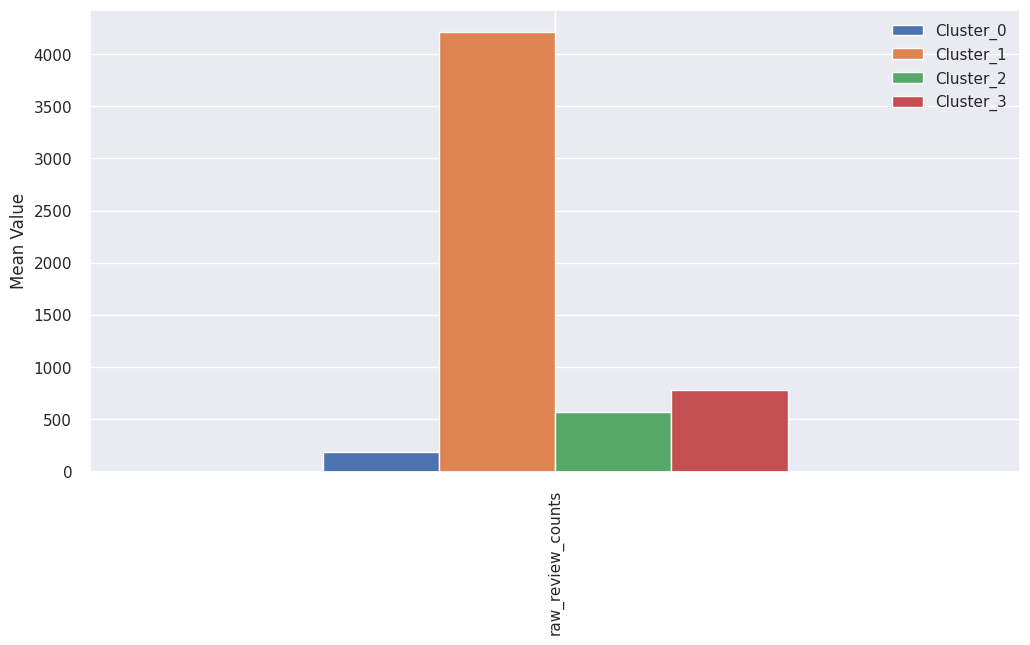

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
cm = pd.DataFrame(cluster_means)
cm.index = [f'Cluster_{x}' for x in cm.index]
cm[['raw_review_counts']].T.plot.bar(ax=ax)
plt.ylabel('Mean Value')
plt.show()

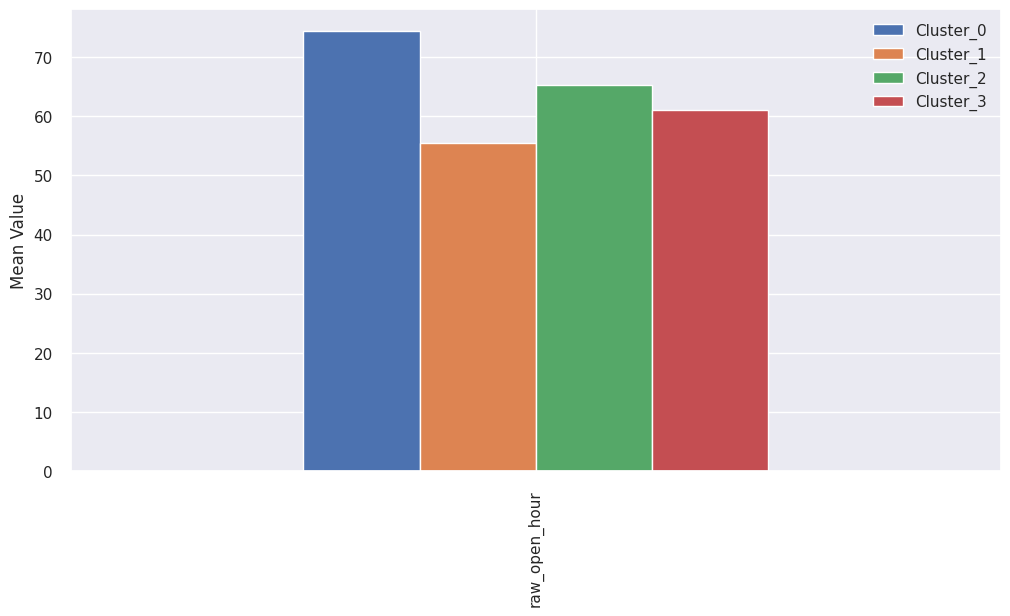

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
cm = pd.DataFrame(cluster_means)
cm.index = [f'Cluster_{x}' for x in cm.index]
cm[['raw_open_hour']].T.plot.bar(ax=ax)
plt.ylabel('Mean Value')
plt.show()

In [ ]:
cluster_df_scaled.groupby(['segment','binned_score']).mean()[['raw_score', 'raw_review_counts', 'coded_size','raw_open_hour']]

raw_score  raw_review_counts  coded_size  raw_open_hour
segment binned_score                                                         
0       high           3.651515         186.469518   -0.585070      73.703454
        low            3.750000         585.882883   -0.378760      69.714741
        medium         3.652778         208.799049   -0.512557      78.419782
1       high           4.137500        4177.950000    0.975934      55.837818
        medium         4.000000        4593.500000    0.524369      51.339741
2       high           3.416667         669.029530   -0.044268      64.012461
        medium         3.500000         258.500000    0.022630      68.964741
3       high           3.978659         767.393293    0.298587      60.716384
        low            4.000000         454.800000   -0.258343      60.671793
        medium         3.948276         878.224138    0.462084      63.192361

for group 0, 1, 2, the yelp score and review counts are different. e.g. cluster 2 lowest score and count. cluster 1 medium score highest count. cluster 0 highest score and medium count.

In [ ]:
cluster_df_scaled.groupby(['segment','binned_score']).count().reset_index()

,segment,binned_score,score,open_hours_week,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity,raw_score,raw_review_counts,raw_price,raw_size,raw_open_hour
0,0,high,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429
1,0,low,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,0,medium,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
3,1,high,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
4,1,medium,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
5,2,high,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
6,2,medium,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
7,3,high,656,656,656,656,656,656,656,656,656,656,656,656,656,656,656,656,656,656
8,3,low,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
9,3,medium,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116


In [ ]:
cluster_df_scaled.groupby(['segment']).count().iloc[:,0]

segment
0    503
1     44
2     24
3    777
Name: score, dtype: int64

In [ ]:
res_df = cluster_df_scaled.groupby(['segment','binned_score']).count().iloc[:,0]
res_df.to_csv('res.csv', index=False)

In [ ]:
# df = cluster_df_scaled.groupby(['segment','score_binned']).count().reset_index().iloc[:,:3].rename(columns={"score": "count", 'score_binned':'performance'})
# df.to_csv('res.csv', index=False)

In [ ]:
res_df

segment  binned_score
0        high            429
         low               2
         medium           72
1        high             40
         medium            4
2        high             18
         medium            6
3        high            656
         low               5
         medium          116
Name: score, dtype: int64

### use pca to reduce dimensions before clustering

In [11]:
std_df

,score,open_hours_week,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity
0,-0.612669,0.000000,-0.980847,-0.679453,0.265593,-0.500002,-1.869046,0.134636,-0.393826,-2.379669,-0.334925,0.438227,0.207423
1,-1.489398,0.000000,1.427498,0.172470,0.265593,-0.131053,0.535032,0.134636,-0.393826,-0.320401,0.614558,-0.522348,-0.247213
2,-0.612669,0.000000,-0.980847,-0.448788,0.265593,-0.432676,0.535032,0.134636,-0.393826,-0.732254,-0.334925,-1.115933,-0.130534
3,-0.612669,1.978132,0.223326,1.328872,0.265593,0.466132,0.535032,0.134636,-0.393826,0.366022,-0.334925,0.581343,-0.155440
4,0.264059,-1.591268,1.427498,1.744069,3.643138,5.032883,0.535032,0.134636,-0.393826,1.876153,7.854370,1.320346,0.775320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,0.264059,1.978132,-0.980847,-0.575910,-1.423179,-0.458933,-1.869046,0.134636,-0.393826,-1.006823,-0.334925,-0.226351,-0.393990
1344,-0.612669,0.000000,1.427498,0.511804,0.265593,-0.264360,0.535032,0.134636,-0.393826,0.091453,-0.097555,-0.670532,0.046206
1345,0.264059,0.914906,0.223326,-0.170965,0.265593,-0.236756,0.535032,0.134636,2.539196,0.091453,-0.097555,-0.026008,-0.013895
1346,0.264059,1.168055,-0.980847,-0.396504,-1.423179,-0.388913,-1.869046,0.134636,2.539196,-0.457685,-0.334925,-0.313376,-0.804423


In [12]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# X_std_df = std_df.drop(columns=['binned_score'])

In [13]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(std_df)
PCA_ds = pd.DataFrame(pca.transform(std_df), columns=(["feature1","feature2", "feature3"]))
# PCA_ds.describe().T

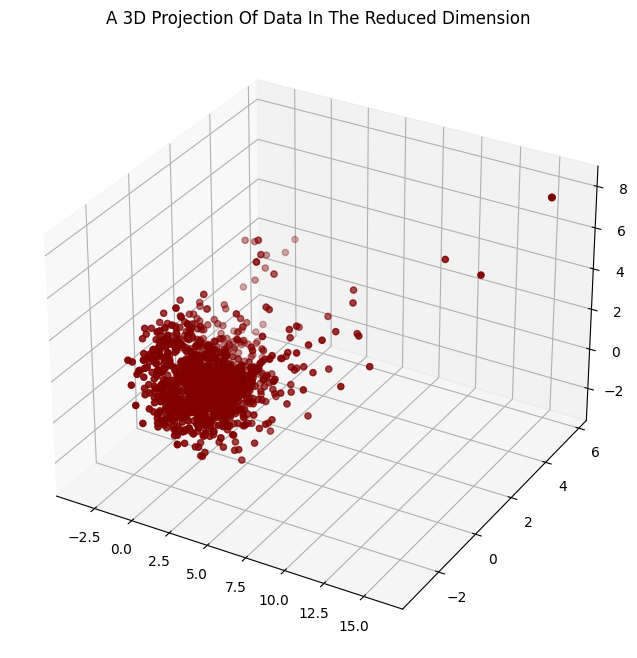

In [14]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["feature1"]
y =PCA_ds["feature2"]
z =PCA_ds["feature3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


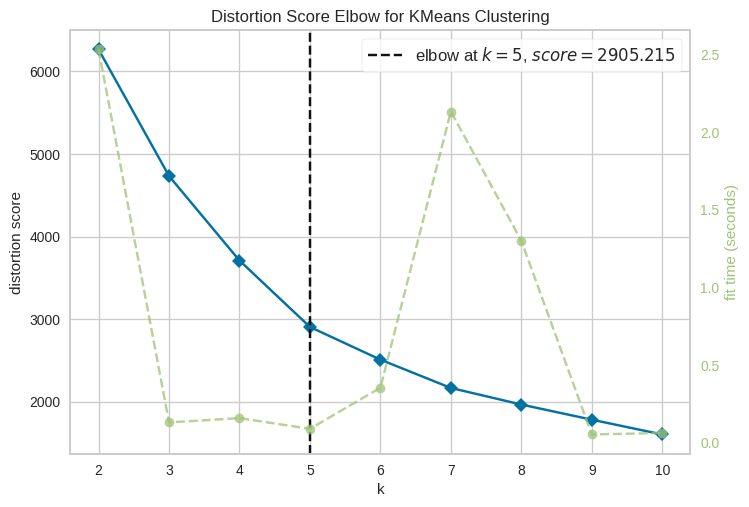

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
# Quick examination of elbow method to find numbers of clusters to make.
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=2009), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()
# fig = Elbow_M

In [16]:
model = KMeans(n_clusters=5, random_state=2009)
model.fit(PCA_ds)

KMeans(n_clusters=5, random_state=2009)

In [17]:
labels = model.labels_
labels

array([1, 2, 2, ..., 3, 1, 0], dtype=int32)

In [18]:
#Adding the Clusters feature to the orignal dataframe.
PCA_ds['clusters'] = labels
X_df['clusters'] = labels

In [19]:
cmap = sns.set_palette('pastel')

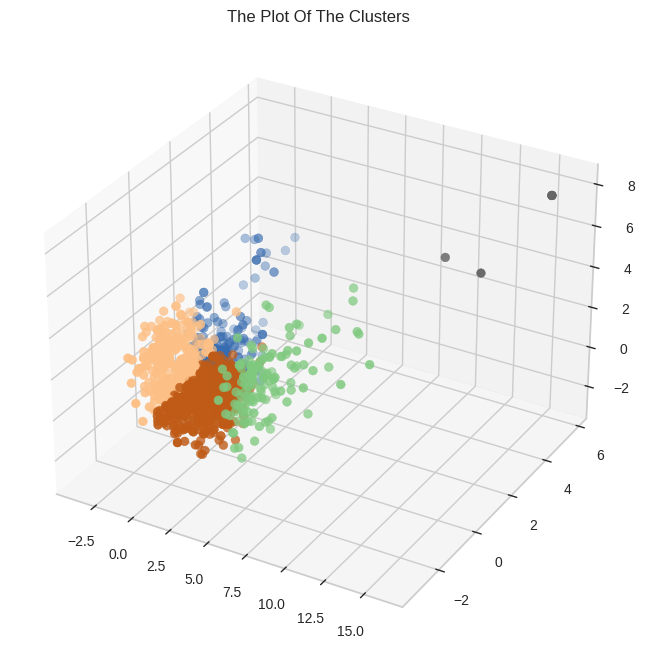

In [20]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["clusters"], marker='o', cmap = 'Accent')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [21]:
std_df

,score,open_hours_week,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity
0,-0.612669,0.000000,-0.980847,-0.679453,0.265593,-0.500002,-1.869046,0.134636,-0.393826,-2.379669,-0.334925,0.438227,0.207423
1,-1.489398,0.000000,1.427498,0.172470,0.265593,-0.131053,0.535032,0.134636,-0.393826,-0.320401,0.614558,-0.522348,-0.247213
2,-0.612669,0.000000,-0.980847,-0.448788,0.265593,-0.432676,0.535032,0.134636,-0.393826,-0.732254,-0.334925,-1.115933,-0.130534
3,-0.612669,1.978132,0.223326,1.328872,0.265593,0.466132,0.535032,0.134636,-0.393826,0.366022,-0.334925,0.581343,-0.155440
4,0.264059,-1.591268,1.427498,1.744069,3.643138,5.032883,0.535032,0.134636,-0.393826,1.876153,7.854370,1.320346,0.775320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,0.264059,1.978132,-0.980847,-0.575910,-1.423179,-0.458933,-1.869046,0.134636,-0.393826,-1.006823,-0.334925,-0.226351,-0.393990
1344,-0.612669,0.000000,1.427498,0.511804,0.265593,-0.264360,0.535032,0.134636,-0.393826,0.091453,-0.097555,-0.670532,0.046206
1345,0.264059,0.914906,0.223326,-0.170965,0.265593,-0.236756,0.535032,0.134636,2.539196,0.091453,-0.097555,-0.026008,-0.013895
1346,0.264059,1.168055,-0.980847,-0.396504,-1.423179,-0.388913,-1.869046,0.134636,2.539196,-0.457685,-0.334925,-0.313376,-0.804423


In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=55, random_state=2009, n_iter=1000, learning_rate=200)  # Changed perplexity from 100 to 50 per FAQ
X_embedded = tsne.fit_transform(PCA_ds)

[t-SNE] Computing 166 nearest neighbors...
[t-SNE] Indexed 1348 samples in 0.002s...
[t-SNE] Computed neighbors for 1348 samples in 0.153s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1348
[t-SNE] Computed conditional probabilities for sample 1348 / 1348
[t-SNE] Mean sigma: 0.484962
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.973988
[t-SNE] KL divergence after 1000 iterations: 0.472927


In [25]:
X_embedded

array([[-10.797697 ,  32.113525 ],
       [-32.90711  ,  -6.2657194],
       [-28.250206 ,   1.0970731],
       ...,
       [ -2.6665835, -19.872902 ],
       [-15.099771 ,  31.39985  ],
       [ 35.05676  ,  18.885256 ]], dtype=float32)

In [26]:
data_sne = pd.DataFrame({
    'col1': X_embedded[:,0],
    'col2': X_embedded[:,1],
    'cluster': labels
})

In [27]:
data_sne

,col1,col2,cluster
0,-10.797697,32.113525,1
1,-32.907108,-6.265719,2
2,-28.250206,1.097073,2
3,-1.425486,-13.298741,3
4,34.319370,12.507576,0
...,...,...,...
1343,-15.361558,32.377979,1
1344,-0.528111,-6.546536,3
1345,-2.666584,-19.872902,3
1346,-15.099771,31.399851,1


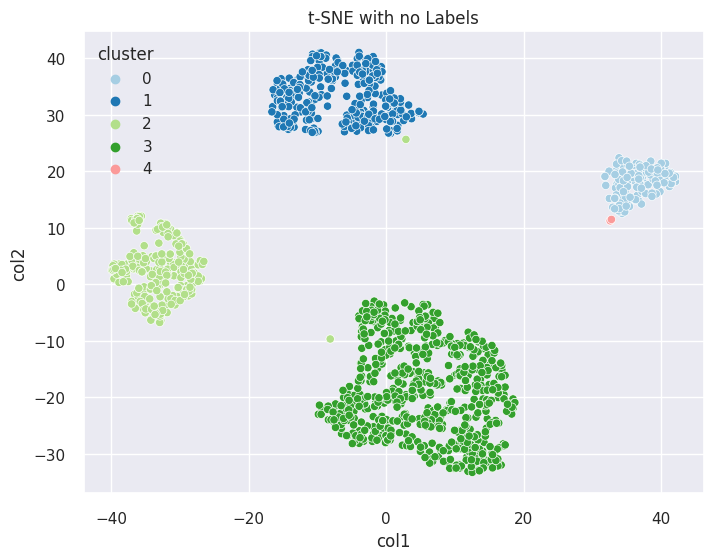

In [28]:
# sns settings
sns.set(rc={'figure.figsize':(8,6)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(data=data_sne, x=data_sne['col1'], y=data_sne['col2'], hue='cluster', legend='full', palette='Paired')
# plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.title('t-SNE with no Labels')
# plt.savefig("t-sne_covid19.png")
plt.show()

In [ ]:
X_raw.head(1)

,restaurant_id,url,FACILITY_NAME,name,address,score,review_counts,price,category,open_time,amenities,open_hours_week,new_address,state,zipcode,city,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,comments_list,binned_score,coded_size,coded_review_counts,coded_price,polarity,subjectivity,size
0,753,https://www.yelp.com/biz/one-cafe-los-angeles-...,#1 CAFE,One Cafe,"2080 Century Park E Los Angeles, CA 90067",3.5,7 reviews,$$,Cafes,NaN,Amenities and More\r\nHealth ScoreA\r\nOffers ...,65.929481,2080 Century Park E Los Angeles,CA,90067,Los Angeles,18.0,0,1,0,4.0,0.0,"[""Hi, it's Pauly P here dropping a bomb review...",high,0,7.0,1,0.252802,0.571214,0-30


In [ ]:
X_df.head(1)

,score,open_hours_week,binned_score,coded_size,coded_review_counts,coded_price,num_photos,is_bus_web,is_phone_number,is_message_bus,num_attributes,num_questions,polarity,subjectivity,binned_score_y,clusters
0,3.5,65.929481,high,0,7.0,1,18.0,0,1,0,4.0,0.0,0.252802,0.571214,2,1


In [29]:
from sklearn.manifold import TSNE
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=3):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names_out()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

In [108]:
def LDA(best_k, X_df):
    # First, we will create 5 vectorizers, one for each of our cluster labels
    vectorizers = []
    for ii in range(0, best_k):
        # Creating a vectorizer
        vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))
    
    # Now we will vectorize the data from each of our clusters
    vectorized_data = []
    for current_cluster, cvec in enumerate(vectorizers):
        try:
            vectorized_data.append(cvec.fit_transform(X_df.loc[X_df['clusters'] == current_cluster, 'comments_list']))
        except Exception as e:
            # print("Not enough instances in cluster: " + str(current_cluster))
            vectorized_data.append(None)
            
    # number of topics per cluster
    NUM_TOPICS_PER_CLUSTER = best_k
    lda_models = []
    for ii in range(0, best_k):
        # Latent Dirichlet Allocation Model
        lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=2009)
        # lda = gensim.models.LdaMulticore(bow_corpus,
        #                            num_topics = best_k,
        #                             id2word = dic,
        #                               passes = 10,
        #                               workers = 2)
        lda_models.append(lda)
    
    # For each cluster, we had created a corresponding LDA model in the previous step. We will now fit_transform all the LDA models on their respective cluster vectors
    clusters_lda_data = []
    for current_cluster, lda in enumerate(lda_models):
        print("Current Cluster: " + str(current_cluster))
        
        if vectorized_data[current_cluster] != None:
            clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))
    
    # Extracts the keywords from each cluster
    all_keywords = []
    for current_vectorizer, lda in enumerate(lda_models):
        print("Current Cluster: " + str(current_vectorizer))

        if vectorized_data[current_vectorizer] != None:
            all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))
    
    return all_keywords, lda_models

In [73]:
X_df['comments_list'] = X_raw['comments_list']
# X_df

In [135]:
all_keywords, lda_models = LDA(5, X_df)

Current Cluster: 0
Current Cluster: 1
Current Cluster: 2
Current Cluster: 3
Current Cluster: 4
Current Cluster: 0
Current Cluster: 1
Current Cluster: 2
Current Cluster: 3
Current Cluster: 4


In [78]:
print(all_keywords[0])

['order', 'really', 'ramen', 'restaurant', 'broth', 'noodles', 'pie', 'meat', 'sweet', 'quality', 'beef', 'dog', 'room', 'hot']


In [110]:
len(all_keywords)

4

In [136]:
all_keywords

[['order',
  'really',
  'ramen',
  'restaurant',
  'broth',
  'noodles',
  'pie',
  'meat',
  'sweet',
  'quality',
  'beef',
  'dog',
  'room',
  'hot'],
 ['food',
  'like',
  'just',
  'ice',
  'cream',
  'cone',
  'burger',
  'fries',
  'got',
  'order',
  'boba',
  'kimbap',
  'pita',
  'breakfast',
  'mediterranean'],
 ['food', 'good', 'chicken', 'chinese', 'like', 'place', 'order'],
 ['chicken',
  'rice',
  'restaurant',
  'time',
  'nthe',
  'ordered',
  'sushi',
  'indian',
  'fish',
  'naan',
  'roll',
  'donuts',
  'donut',
  'bread']]

In [112]:
import re
metrics = []
def calculate_metrics():
    for i in range(4):
        corpus = set()
        for comment in X_df[X_df.clusters==i]['comments_list']:
            comment.strip()
            comment.strip('[')
            comment.strip(']')
            comment = re.sub(r'@\S*.,?!','',comment)
            comment = re.sub(r'"','',comment)
            comment = re.sub(r"'",'',comment)
            comment = re.sub(r"\[\]",'',comment)
            comment_list = comment.lower().split(' ')
            for word in comment_list:
                corpus.add(word)
        t = 0
        print(i)
        for key in all_keywords[i]:
            if key in corpus:
                t += 1
        metrics.append(t/len(all_keywords[i]))
    return metrics

In [113]:
metrics = calculate_metrics()

0
1
2
3


In [114]:
metrics

[1.0, 1.0, 1.0, 0.9285714285714286]

In [129]:
X_raw['clusters'] = X_df['clusters']


In [145]:
sample = X_raw.sample(10)

In [146]:
sample_dic = dict(zip(sample[['url','clusters']].url,sample[['url','clusters']].clusters ))

In [147]:
sample_dic

{'https://www.yelp.com/biz/papa-johns-pizza-los-angeles-25?osq=Restaurants': 2,
 'https://www.yelp.com/biz/moishes-restaurant-los-angeles?osq=Restaurants': 3,
 'https://www.yelp.com/biz/hot-thai-restaurant-los-angeles?osq=Restaurants': 3,
 'https://www.yelp.com/biz/eduardos-border-grill-los-angeles?osq=Restaurants': 1,
 'https://www.yelp.com/biz/moms-donut-and-chinese-food-to-go-los-angeles?osq=Restaurants': 1,
 'https://www.yelp.com/biz/kai-ramen-west-hollywood-los-angeles?osq=Restaurants': 3,
 'https://www.yelp.com/biz/pharaoh-karaoke-lounge-los-angeles-3': 0,
 'https://www.yelp.com/biz/ginger-s-divine-ice-creams-los-angeles': 3,
 'https://www.yelp.com/biz/sanamluang-cafe-hollywood-los-angeles?osq=Restaurants': 0,
 'https://www.yelp.com/biz/ministry-of-coffee-los-angeles?osq=Restaurants': 1}

In [148]:
rest = ['Pharaoh Karaoke Lounge','Sanamluang Cafe Hollywood',"Eduardo's Border Grill",\
        "Mom's Donut and Chinese Food to Go","Ministry Of Coffee","Papa Johns Pizza",\
        "Moishe's Restaurant","Hot Thai Restaurant","Kai Ramen West Hollywood",\
        "Ginger’s Divine Ice Creams"]
cluster = [0,0,1,1,1,2,3,3,3,3]
included = [False,True, True, False, True, True,True,True,True,False]

In [149]:
pd.DataFrame({
    'restaurant':rest,
    'cluster':cluster,
    'is_included':included
})

,restaurant,cluster,is_included
0,Pharaoh Karaoke Lounge,0,False
1,Sanamluang Cafe Hollywood,0,True
2,Eduardo's Border Grill,1,True
3,Mom's Donut and Chinese Food to Go,1,False
4,Ministry Of Coffee,1,True
5,Papa Johns Pizza,2,True
6,Moishe's Restaurant,3,True
7,Hot Thai Restaurant,3,True
8,Kai Ramen West Hollywood,3,True
9,Ginger’s Divine Ice Creams,3,False


In [154]:
pd.read_csv('/content/drive/MyDrive/DSCI 560 Project/Data/combined_rest_health_0331_filtered.csv')[['FACILITY_NAME','FACILITY_ADDRESS','name','address']]

,FACILITY_NAME,FACILITY_ADDRESS,name,address
0,#1 CAFE,2080 CENTURY PARK E STE 108,One Cafe,"2080 Century Park E Los Angeles, CA 90067"
1,#2 MOON BBQ,478 N WESTERN AVE,Moon BBQ 2,"478 N Western Ave Los Angeles, CA 90004"
2,101 ASIAN KITCHEN INC,7170 BEVERLY BLVD,101 Asian Kitchen,"7170 Beverly Blvd Los Angeles, CA 90036"
3,25 DEGREES,7000 HOLLYWOOD BLVD,25 Degrees,7000 Hollywood Blvd Hollywood Roosevelt Hotel ...
4,6TH STREET MARKET,212 W 6TH ST,6th Street Market,"212 W 6th St Space 212 Los Angeles, CA 90014"
...,...,...,...,...
1392,ZAMORA BROS. MEAT MARKET,1559 W PICO BLVD,Zamora Brothers,"1559 W Pico Blvd Los Angeles, CA 90015"
1393,ZANKOU CHICKEN,5065 W SUNSET BLVD,Zankou Chicken - Hollywood,"5065 W Sunset Blvd Los Angeles, CA 90027"
1394,ZANKOU CHICKEN,7851 W SUNSET BLVD,Zankou Chicken,"7851 W Sunset Blvd Los Angeles, CA 90046"
1395,ZERMENOS RESTAURANT INC,6115 SANTA MONICA BLVD UNIT UNIT,Zermenos Restaurant,"6115 Santa Monica Blvd Ste A Los Angeles, CA 9..."


In [134]:
all_keywords

[['order',
  'really',
  'ramen',
  'restaurant',
  'broth',
  'noodles',
  'pie',
  'meat',
  'sweet',
  'quality',
  'beef',
  'dog',
  'room',
  'hot'],
 ['food',
  'like',
  'just',
  'ice',
  'cream',
  'cone',
  'burger',
  'fries',
  'got',
  'order',
  'boba',
  'kimbap',
  'pita',
  'breakfast',
  'mediterranean'],
 ['food', 'good', 'chicken', 'chinese', 'like', 'place', 'order'],
 ['chicken',
  'rice',
  'restaurant',
  'time',
  'nthe',
  'ordered',
  'sushi',
  'indian',
  'fish',
  'naan',
  'roll',
  'donuts',
  'donut',
  'bread']]

In [ ]:
# import nltk
# from nltk.stem import *
# nltk.download('punkt') # For Stemming
# nltk.download('wordnet') # For Lemmatization
# nltk.download('stopwords') # For Stopword Removal
# nltk.download('omw-1.4')



In [ ]:
# stopwords = set(nltk.corpus.stopwords.words('english'))

# import pandas as pd
# import numpy as np
# from sklearn.datasets import fetch_20newsgroups
# # fetch20newsgroups = fetch_20newsgroups(subset='train')
# # Store in a pandas dataframe
# df = X_raw
# df

In [63]:
# sw_append = ["n't",'The','good','time','like','place','get']
# for sw in sw_append:
#     stopwords.add(sw)

In [64]:
# # Remove URLs
# import re # Import regular expression package
# def remove_url(text):
#     return re.sub(r'https?:\S*','',text)
# df.comments_list = df.comments_list.apply(remove_url)
# # Remove mentions and hashtags
# import re
# def remove_mentions_and_tags(text):
#      text = re.sub(r'@\S*','',text)
#      return re.sub(r'#\S*','',text)
# df.comments_list = df.comments_list.apply(remove_mentions_and_tags)

In [65]:
# def text_preprocessing(df):
#     corpus=[]
    
#     lem = WordNetLemmatizer() # For Lemmatization
#     for news in df['comments_list']:
#         news = news.strip('[')
#         news = news.strip(']')
#         words=[w for w in nltk.tokenize.word_tokenize(news) if (w not in stopwords)] # word_tokenize function tokenizes text on each word by default
#         words=[lem.lemmatize(w) for w in words if len(w)>2]
#         corpus.append(words)
#     return corpus
# # Apply this function on our data frame
# corpus = text_preprocessing(df)

In [66]:
# import gensim
# # Transform to gensim dictionary
# dic = gensim.corpora.Dictionary(corpus) 
# bow_corpus = [dic.doc2bow(doc) for doc in corpus]
# # import pickle # Useful for storing big datasets
# # pickle.dump(bow_corpus, open('corpus.pkl', 'wb'))
# # dic.save('dictionary.gensim')

In [67]:
# res, lda_models = LDA(5, X_df, dic, bow_corpus)

In [68]:
# for lda_model in lda_models:
#     for idx, topic in lda_model.print_topics(num_words=10):    
#         # print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.014*"food" + 0.007*"order" + 0.006*"service" + 0.005*"great" + 0.005*"back" + 0.005*"one" + 0.005*"would" + 0.004*"got" + 0.004*"restaurant" + 0.004*"really"
Topic: 1 
Words: 0.012*"pizza" + 0.008*"food" + 0.007*"order" + 0.005*"chicken" + 0.005*"one" + 0.005*"service" + 0.004*"'ve" + 0.004*"ordered" + 0.004*"donut" + 0.004*"got"
Topic: 2 
Words: 0.008*"food" + 0.007*"sandwich" + 0.005*"great" + 0.005*"also" + 0.004*"coffee" + 0.004*"breakfast" + 0.004*"They" + 0.004*"back" + 0.004*"order" + 0.004*"service"
Topic: 3 
Words: 0.014*"food" + 0.008*"chicken" + 0.006*"order" + 0.005*"service" + 0.005*"one" + 0.005*"back" + 0.005*"rice" + 0.004*"great" + 0.004*"They" + 0.004*"would"
Topic: 4 
Words: 0.012*"food" + 0.006*"restaurant" + 0.006*"great" + 0.005*"dish" + 0.005*"order" + 0.005*"service" + 0.005*"really" + 0.005*"ordered" + 0.005*"one" + 0.004*"also"
Topic: 0 
Words: 0.012*"food" + 0.007*"restaurant" + 0.006*"great" + 0.005*"dish" + 0.005*"service" + 0.005*"also" 

In [69]:
# from gensim.models import CoherenceModel
# # instantiate topic coherence model
# coherence_list = []
# for lda_model in lda_models:
#     cm = CoherenceModel(model=lda_model, corpus=bow_corpus, texts=corpus, coherence='c_v')
#     coherence_lda = cm.get_coherence()
#     coherence_list.append(coherence_lda)

In [70]:
# coherence_list

[0.27725173376159573,
 0.2791656713422717,
 0.28210796425133705,
 0.2833229499482655,
 0.2759259617160269]

look at the group distribution of clustring

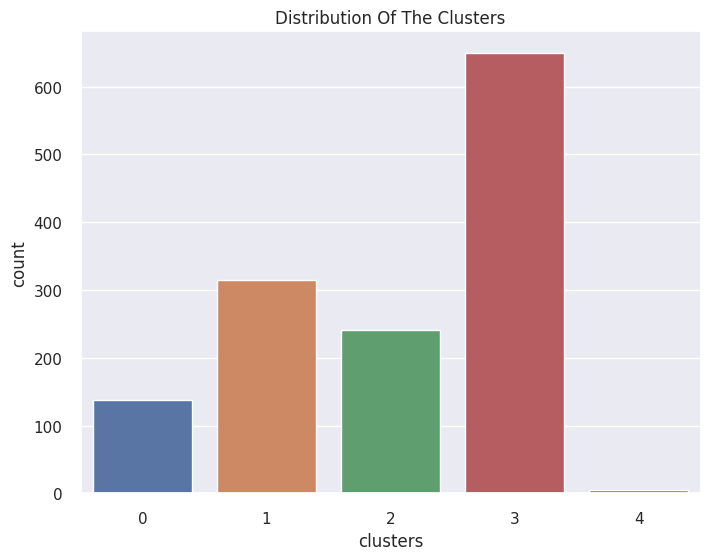

In [ ]:
fig = sns.countplot(x=X_df['clusters'])
fig.set_title("Distribution Of The Clusters")
plt.show()

cluster 4 has very few samples

In [ ]:
X_df.columns

Index(['score', 'open_hours_week', 'binned_score', 'coded_size',
       'coded_review_counts', 'coded_price', 'num_photos', 'is_bus_web',
       'is_phone_number', 'is_message_bus', 'num_attributes', 'num_questions',
       'polarity', 'subjectivity', 'binned_score_y', 'clusters',
       'comments_list'],
      dtype='object')

In [ ]:
X_raw.columns

Index(['restaurant_id', 'url', 'FACILITY_NAME', 'name', 'address', 'score',
       'review_counts', 'price', 'category', 'open_time', 'amenities',
       'open_hours_week', 'new_address', 'state', 'zipcode', 'city',
       'num_photos', 'is_bus_web', 'is_phone_number', 'is_message_bus',
       'num_attributes', 'num_questions', 'comments_list', 'binned_score',
       'coded_size', 'coded_review_counts', 'coded_price', 'polarity',
       'subjectivity', 'size'],
      dtype='object')

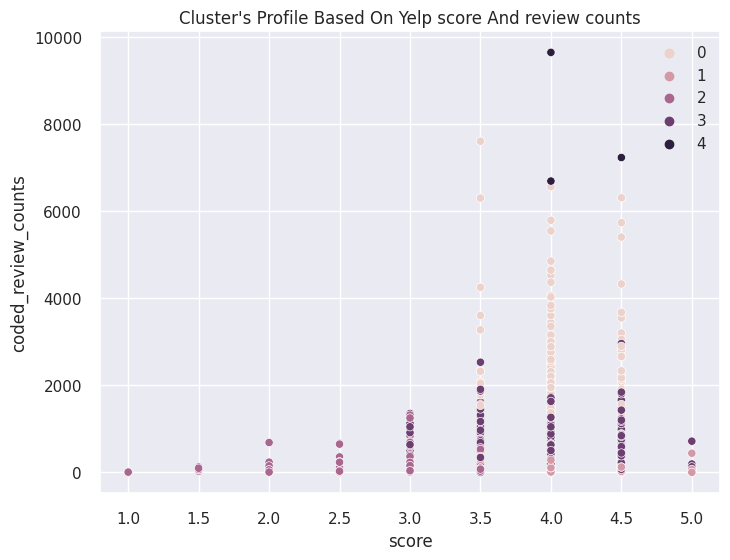

In [ ]:
pl = sns.scatterplot(data = X_df,x=X_df["score"], y=X_df["coded_review_counts"],hue=X_df["clusters"])
pl.set_title("Cluster's Profile Based On Yelp score And review counts")
plt.legend()
plt.show()

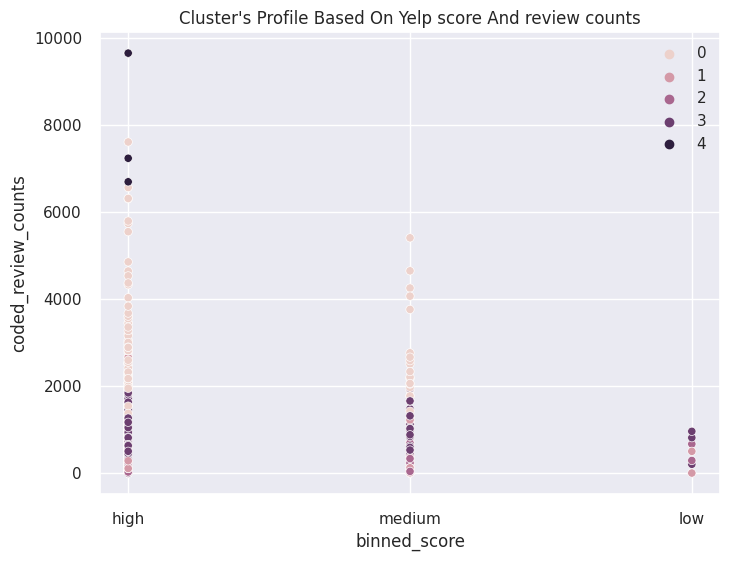

In [ ]:
pl = sns.scatterplot(data = X_df,x=X_df["binned_score"], y=X_df["coded_review_counts"],hue=X_df["clusters"])
pl.set_title("Cluster's Profile Based On Yelp score And review counts")
plt.legend()
plt.show()

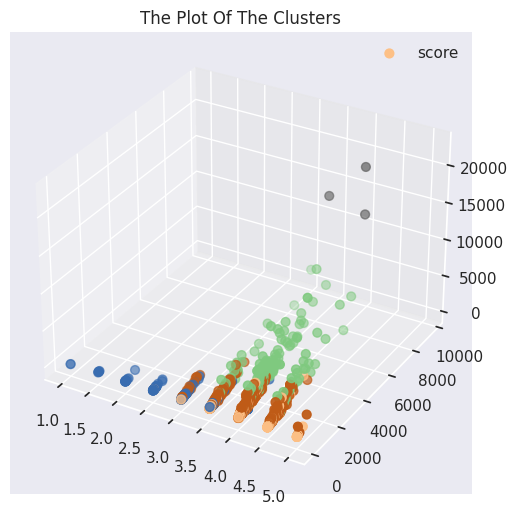

In [ ]:
#Plotting the clusters
# fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(X_df['score'], X_df['coded_review_counts'], X_df['num_photos'], s=40, c=X_df["clusters"], marker='o', cmap = 'Accent')
ax.set_title("The Plot Of The Clusters")
ax.legend(['score', 'review_counts','photos'],loc='best')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(X_df, X_df['score'], X_df['coded_review_counts'], X_df['num_photos'],
              color='binned_score')
fig.show()

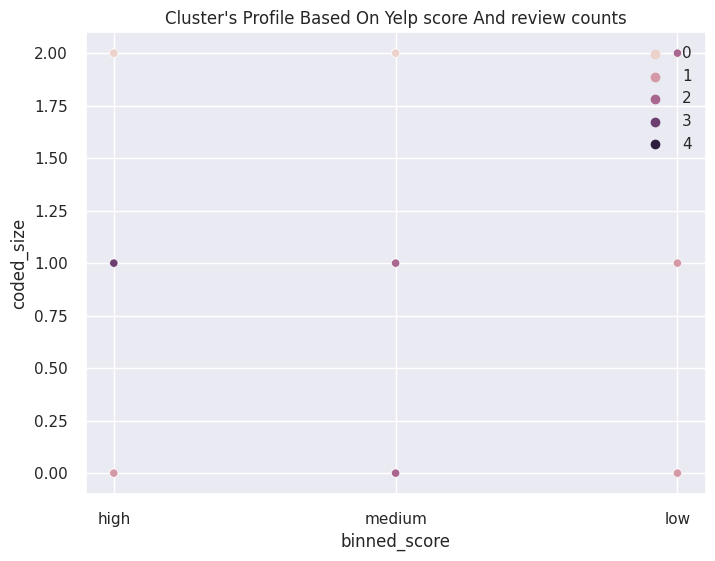

In [ ]:
pl = sns.scatterplot(data = X_df,x=X_df["binned_score"], y=X_df["coded_size"],hue=X_df["clusters"])
pl.set_title("Cluster's Profile Based On Yelp score And review counts")
plt.legend()
plt.show()

As you can see:

group 0: medium score + high reviews

group 1: low score + few reviews

group 2: medium score + few reviews

group 3: medium score + medium reviews

group 4: high + high

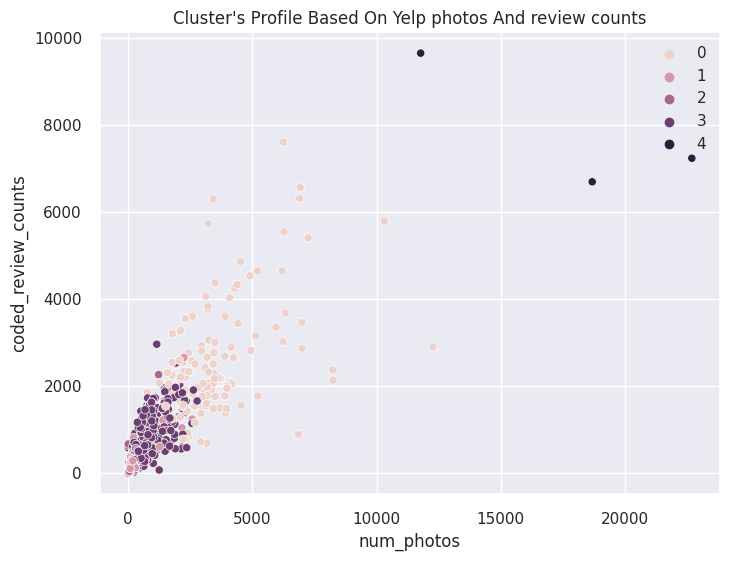

In [ ]:
pl = sns.scatterplot(data = X_df,x=X_df["num_photos"], y=X_df["coded_review_counts"],hue=X_df["clusters"])
pl.set_title("Cluster's Profile Based On Yelp photos And review counts")
plt.legend()
plt.show()

In [ ]:
X_df.columns

Index(['score', 'open_hours_week', 'binned_score', 'coded_size',
       'coded_review_counts', 'coded_price', 'num_photos', 'is_bus_web',
       'is_phone_number', 'is_message_bus', 'num_attributes', 'num_questions',
       'polarity', 'subjectivity', 'binned_score_y', 'clusters',
       'comments_list'],
      dtype='object')

As you can see:

group 0: few photos + few reviews

group 1: medium photos + medium reviews

group 2, 3 the similar

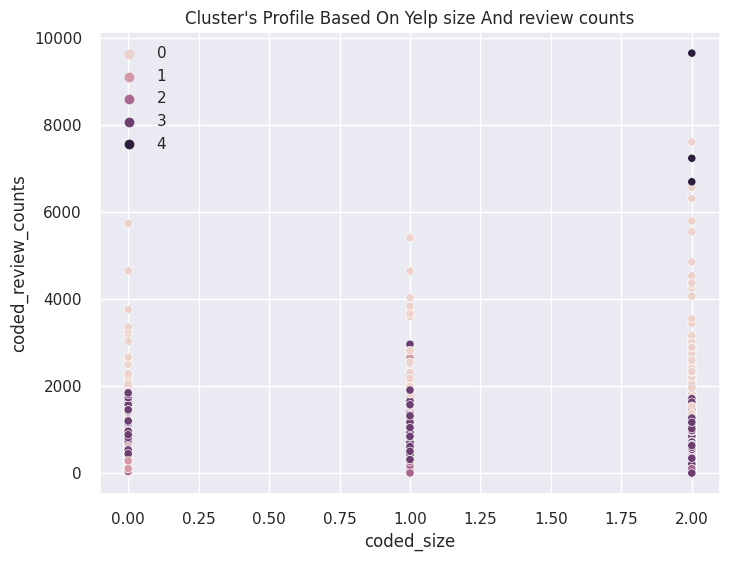

In [ ]:
pl = sns.scatterplot(data = X_df,x=X_df["coded_size"], y=X_df["coded_review_counts"],hue=X_df["clusters"])
pl.set_title("Cluster's Profile Based On Yelp size And review counts")
plt.legend()
plt.show()

In [ ]:
X_df.columns

Index(['score', 'open_hours_week', 'binned_score', 'coded_size',
       'coded_review_counts', 'coded_price', 'num_photos', 'is_bus_web',
       'is_phone_number', 'is_message_bus', 'num_attributes', 'num_questions',
       'polarity', 'subjectivity', 'binned_score_y', 'clusters',
       'comments_list'],
      dtype='object')

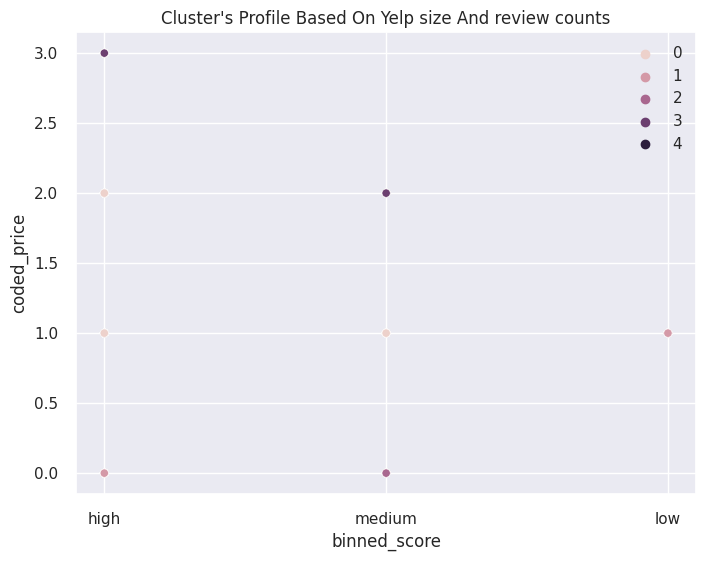

In [ ]:
pl = sns.scatterplot(data = X_df,x=X_df["binned_score"], y=X_df["coded_price"],hue=X_df["clusters"])
pl.set_title("Cluster's Profile Based On Yelp size And review counts")
plt.legend()
plt.show()

In [ ]:
res = X_df.groupby(['clusters','binned_score']).count()['score'].reset_index()

In [ ]:
res.rename({'binned_score':'score_level', 'score':'count'}, axis=1, inplace=True)

In [ ]:
res

,clusters,score_level,count
0,0,high,112
1,0,medium,26
2,1,high,266
3,1,low,2
4,1,medium,47
5,2,high,200
6,2,low,2
7,2,medium,39
8,3,high,560
9,3,low,3


In [ ]:
res['clusters']

0     0
1     0
2     1
3     1
4     1
5     2
6     2
7     2
8     3
9     3
10    3
11    4
Name: clusters, dtype: int64

In [ ]:
len(res['clusters'].unique())

5

In [ ]:
fig = px.histogram(res, x=res['clusters'].values, y='count',title="Distribution Of The Clusters",
                    color = 'score_level', nbins = len(res['clusters'].unique()))
fig.update_layout(bargap=0.3)
fig.show()

### DBSCAN

In [ ]:
low_df = full_df.drop(columns=['score_binned'])

In [ ]:
score_map = {'low': 0, 'medium': 1, 'high': 2}
label_true = [score_map[x] for x in y_df.values]

In [ ]:
labels_true = y_df.values

In [ ]:
low_df

,score,review_counts,price,type_other,type_restaurant,coded_size,city_BEVERLY HILLS,city_CULVER CITY,city_INGLEWOOD,city_LOS ANGELES,city_MARINA DEL REY,city_SANTA MONICA,city_VENICE,city_WEST HOLLYWOOD,city_other
0,0.160492,1.552638,1.0,0,1,1.0,0,0,0,0,0,0,1,0,0
1,0.160492,1.207879,2.0,0,1,2.0,0,0,0,0,1,0,0,0,0
2,0.160492,1.069476,2.0,0,1,2.0,0,0,0,0,0,0,0,1,0
3,-0.595782,0.713430,1.0,1,0,1.0,0,0,0,0,0,1,0,0,0
4,-0.595782,0.713430,1.0,0,1,1.0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,0.160492,0.928372,1.0,0,1,1.0,0,0,0,1,0,0,0,0,0
3291,-7.690979,-1.951295,1.0,0,1,1.0,0,0,0,1,0,0,0,0,0
3292,0.827573,-1.951295,1.0,1,0,1.0,0,0,0,1,0,0,0,0,0
3293,-0.595782,1.063306,1.0,0,1,2.0,0,0,0,1,0,0,0,0,0


In [ ]:
dbscan_df = low_df[['score', 'review_counts', 'price']]

In [ ]:
PCA_ds

,feature1,feature2,feature3,clusters
0,-2.089346,-0.415559,1.086617,0
1,0.369614,1.571535,-1.032192,3
2,-1.206459,0.689255,-0.509838,5
3,0.769185,0.592153,0.290203,3
4,9.067642,1.223634,1.627650,2
...,...,...,...,...
1343,-2.388863,-0.044991,2.213996,0
1344,0.459915,0.973499,-1.117812,3
1345,0.048278,0.121817,-0.032706,3
1346,-1.916511,0.238553,2.254733,0


Estimated number of clusters: 9
Estimated number of noise points: 1010
Homogeneity: 0.231
Completeness: 0.354
V-measure: 0.280
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.271
Silhouette Coefficient: -0.332


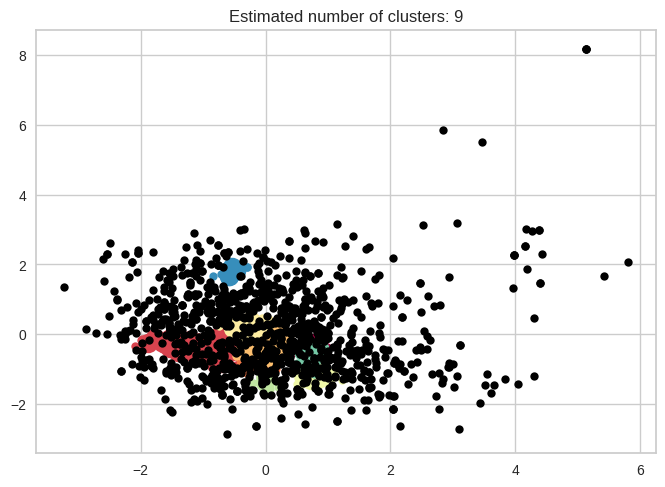

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
# X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
#                             random_state=0)

# X = StandardScaler().fit_transform(X)
labels_true = PCA_ds['clusters']
dbscan_df = PCA_ds.drop(columns=['clusters'])

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(PCA_ds)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(dbscan_df, labels))

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = dbscan_df[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:,1], xy.iloc[:,2], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = PCA_ds[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:,1], xy.iloc[:,2], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()